In [1]:
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sb

import requests
import json
from bs4 import BeautifulSoup
from requests.auth import HTTPBasicAuth #authentication code
from getpass import getpass

import time

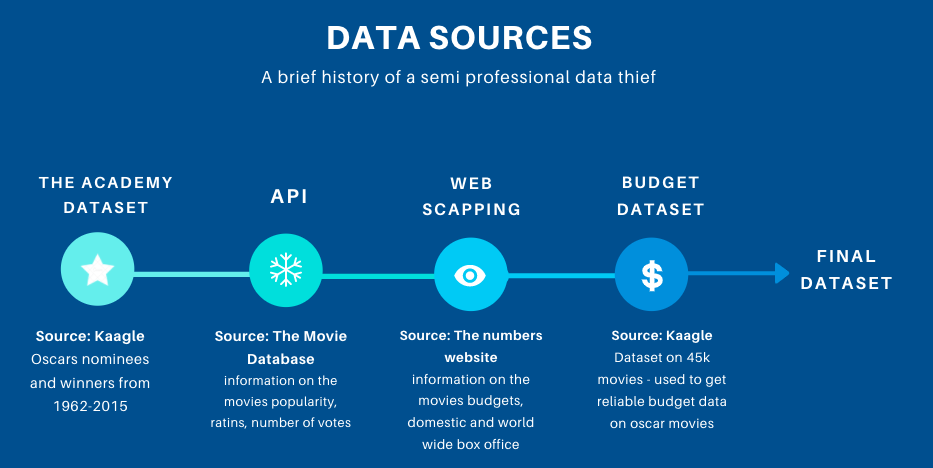

In [374]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='/Users/ritasousabritopereira/Documents/ironhack/Project-Week-3-Data-Thieves/your-project/Data Project3.png')

## The Academy awards (1927-2015)

Dataset from Kaagle: https://www.kaggle.com/theacademy/academy-awards

In [2]:
#import oscars dataset file
oscars = pd.read_csv('database.csv', low_memory=False)
oscars.head()

Year  Ceremony    Award  Winner                 Name              Film
0  1927/1928         1    Actor     NaN  Richard Barthelmess         The Noose
1  1927/1928         1    Actor     1.0        Emil Jannings  The Last Command
2  1927/1928         1  Actress     NaN       Louise Dresser   A Ship Comes In
3  1927/1928         1  Actress     1.0         Janet Gaynor        7th Heaven
4  1927/1928         1  Actress     NaN       Gloria Swanson    Sadie Thompson

This database itself doesn't tell a lot 

In [3]:
len(oscars['Award'].unique())

114

In [4]:
oscars = oscars[(oscars['Award']=='Best Picture')]
oscars

Year  Ceremony         Award  Winner                               Name  \
3924  1962        35  Best Picture     1.0                Lawrence of Arabia    
3925  1962        35  Best Picture     NaN                   The Longest Day    
3926  1962        35  Best Picture     NaN  Meredith Willson's The Music Man    
3927  1962        35  Best Picture     NaN              Mutiny on the Bounty    
3928  1962        35  Best Picture     NaN             To Kill a Mockingbird    
...    ...       ...           ...     ...                                ...   
9916  2015        88  Best Picture     NaN                 Mad Max: Fury Road   
9917  2015        88  Best Picture     NaN                        The Martian   
9918  2015        88  Best Picture     NaN                       The Revenant   
9919  2015        88  Best Picture     NaN                               Room   
9920  2015        88  Best Picture     1.0                          Spotlight   

                                                   Film  
3924                              Sam Spiegel, Producer  
3925                         Darryl F. Zanuck, Producer  
3926                          Morton Da Costa, Producer  
3927                          Aaron Rosenberg, Producer  
3928                           Alan J. Pakula, Producer  
...                                                 ...  
9916         Doug Mitchell and George Miller, Producers  
9917  Simon Kinberg, Ridley Scott, Michael Schaefer ...  
9918  Arnon Milchan, Steve Golin, Alejandro G. Iñárr...  
9919                                Ed Guiney, Producer  
9920  Michael Sugar, Steve Golin, Nicole Rocklin and...  

[298 rows x 6 columns]

In [5]:
oscars = oscars.rename({'Name': 'title'}, axis=1)
oscars.head()

Year  Ceremony         Award  Winner                              title  \
3924  1962        35  Best Picture     1.0                Lawrence of Arabia    
3925  1962        35  Best Picture     NaN                   The Longest Day    
3926  1962        35  Best Picture     NaN  Meredith Willson's The Music Man    
3927  1962        35  Best Picture     NaN              Mutiny on the Bounty    
3928  1962        35  Best Picture     NaN             To Kill a Mockingbird    

                            Film  
3924       Sam Spiegel, Producer  
3925  Darryl F. Zanuck, Producer  
3926   Morton Da Costa, Producer  
3927   Aaron Rosenberg, Producer  
3928    Alan J. Pakula, Producer

In [6]:
oscars['title_year']= oscars['title'].str.strip() + " " + oscars['Year']
oscars.head()

Year  Ceremony         Award  Winner                              title  \
3924  1962        35  Best Picture     1.0                Lawrence of Arabia    
3925  1962        35  Best Picture     NaN                   The Longest Day    
3926  1962        35  Best Picture     NaN  Meredith Willson's The Music Man    
3927  1962        35  Best Picture     NaN              Mutiny on the Bounty    
3928  1962        35  Best Picture     NaN             To Kill a Mockingbird    

                            Film                             title_year  
3924       Sam Spiegel, Producer                Lawrence of Arabia 1962  
3925  Darryl F. Zanuck, Producer                   The Longest Day 1962  
3926   Morton Da Costa, Producer  Meredith Willson's The Music Man 1962  
3927   Aaron Rosenberg, Producer              Mutiny on the Bounty 1962  
3928    Alan J. Pakula, Producer             To Kill a Mockingbird 1962

In [7]:
#get names to search API

list_tiles = list(oscars['title'])
print(list_tiles)

['Lawrence of Arabia ', 'The Longest Day ', "Meredith Willson's The Music Man ", 'Mutiny on the Bounty ', 'To Kill a Mockingbird ', 'America America ', 'Cleopatra ', 'How the West Was Won ', 'Lilies of the Field ', 'Tom Jones ', 'Becket ', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb ', 'Mary Poppins ', 'My Fair Lady ', 'Zorba the Greek ', 'Darling ', 'Doctor Zhivago ', 'Ship of Fools ', 'The Sound of Music ', 'A Thousand Clowns ', 'Alfie ', 'A Man for All Seasons ', 'The Russians Are Coming The Russians Are Coming ', 'The Sand Pebbles ', "Who's Afraid of Virginia Woolf? ", 'Bonnie and Clyde ', 'Doctor Dolittle ', 'The Graduate ', "Guess Who's Coming to Dinner ", 'In the Heat of the Night ', 'Funny Girl ', 'The Lion in Winter ', 'Oliver! ', 'Rachel, Rachel ', 'Romeo and Juliet ', 'Anne of the Thousand Days ', 'Butch Cassidy and the Sundance Kid ', 'Hello, Dolly! ', 'Midnight Cowboy ', 'Z ', 'Airport ', 'Five Easy Pieces ', 'Love Story ', 'MA*S*H ', 'Patton ', '

In [8]:
list_titles2 =[]
for element in list_tiles:
    list_titles2.append(element.strip())
print(list_titles2)

['Lawrence of Arabia', 'The Longest Day', "Meredith Willson's The Music Man", 'Mutiny on the Bounty', 'To Kill a Mockingbird', 'America America', 'Cleopatra', 'How the West Was Won', 'Lilies of the Field', 'Tom Jones', 'Becket', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb', 'Mary Poppins', 'My Fair Lady', 'Zorba the Greek', 'Darling', 'Doctor Zhivago', 'Ship of Fools', 'The Sound of Music', 'A Thousand Clowns', 'Alfie', 'A Man for All Seasons', 'The Russians Are Coming The Russians Are Coming', 'The Sand Pebbles', "Who's Afraid of Virginia Woolf?", 'Bonnie and Clyde', 'Doctor Dolittle', 'The Graduate', "Guess Who's Coming to Dinner", 'In the Heat of the Night', 'Funny Girl', 'The Lion in Winter', 'Oliver!', 'Rachel, Rachel', 'Romeo and Juliet', 'Anne of the Thousand Days', 'Butch Cassidy and the Sundance Kid', 'Hello, Dolly!', 'Midnight Cowboy', 'Z', 'Airport', 'Five Easy Pieces', 'Love Story', 'MA*S*H', 'Patton', 'A Clockwork Orange', 'Fiddler on the Roof', '

In [9]:
print(len(list_titles2))

298


In [10]:
newlist =[]
for element in list_titles2:
    newlist.append(element.split(" "))
print(newlist)

[['Lawrence', 'of', 'Arabia'], ['The', 'Longest', 'Day'], ['Meredith', "Willson's", 'The', 'Music', 'Man'], ['Mutiny', 'on', 'the', 'Bounty'], ['To', 'Kill', 'a', 'Mockingbird'], ['America', 'America'], ['Cleopatra'], ['How', 'the', 'West', 'Was', 'Won'], ['Lilies', 'of', 'the', 'Field'], ['Tom', 'Jones'], ['Becket'], ['Dr.', 'Strangelove', 'or:', 'How', 'I', 'Learned', 'to', 'Stop', 'Worrying', 'and', 'Love', 'the', 'Bomb'], ['Mary', 'Poppins'], ['My', 'Fair', 'Lady'], ['Zorba', 'the', 'Greek'], ['Darling'], ['Doctor', 'Zhivago'], ['Ship', 'of', 'Fools'], ['The', 'Sound', 'of', 'Music'], ['A', 'Thousand', 'Clowns'], ['Alfie'], ['A', 'Man', 'for', 'All', 'Seasons'], ['The', 'Russians', 'Are', 'Coming', 'The', 'Russians', 'Are', 'Coming'], ['The', 'Sand', 'Pebbles'], ["Who's", 'Afraid', 'of', 'Virginia', 'Woolf?'], ['Bonnie', 'and', 'Clyde'], ['Doctor', 'Dolittle'], ['The', 'Graduate'], ['Guess', "Who's", 'Coming', 'to', 'Dinner'], ['In', 'the', 'Heat', 'of', 'the', 'Night'], ['Funny', 

### The Movie Data Base

In [11]:
#play aroung with list above for API url
newlist2 =[]
for element in newlist:
    newlist2.append("+".join(element))
print(newlist2)

['Lawrence+of+Arabia', 'The+Longest+Day', "Meredith+Willson's+The+Music+Man", 'Mutiny+on+the+Bounty', 'To+Kill+a+Mockingbird', 'America+America', 'Cleopatra', 'How+the+West+Was+Won', 'Lilies+of+the+Field', 'Tom+Jones', 'Becket', 'Dr.+Strangelove+or:+How+I+Learned+to+Stop+Worrying+and+Love+the+Bomb', 'Mary+Poppins', 'My+Fair+Lady', 'Zorba+the+Greek', 'Darling', 'Doctor+Zhivago', 'Ship+of+Fools', 'The+Sound+of+Music', 'A+Thousand+Clowns', 'Alfie', 'A+Man+for+All+Seasons', 'The+Russians+Are+Coming+The+Russians+Are+Coming', 'The+Sand+Pebbles', "Who's+Afraid+of+Virginia+Woolf?", 'Bonnie+and+Clyde', 'Doctor+Dolittle', 'The+Graduate', "Guess+Who's+Coming+to+Dinner", 'In+the+Heat+of+the+Night', 'Funny+Girl', 'The+Lion+in+Winter', 'Oliver!', 'Rachel,+Rachel', 'Romeo+and+Juliet', 'Anne+of+the+Thousand+Days', 'Butch+Cassidy+and+the+Sundance+Kid', 'Hello,+Dolly!', 'Midnight+Cowboy', 'Z', 'Airport', 'Five+Easy+Pieces', 'Love+Story', 'MA*S*H', 'Patton', 'A+Clockwork+Orange', 'Fiddler+on+the+Roof', '

###  The Movie DB - Get the API 

In [12]:
def super_function(newlist2):
    df = pd.DataFrame([])
    for title in newlist2:
        try:
            api_key = "5d6ee3c337c9ed1dd8636a0112113fd2"
            response = requests.get('https://api.themoviedb.org/3/search/movie?api_key=' +api_key+ "&query=" + title)
            movie = pd.DataFrame(response.json()['results'])
            df = df.append(movie, sort=False )
        except ValueError:
            pass
    return df
    

TMDB = super_function(newlist2)
TMDB

popularity  vote_count  video                       poster_path      id  \
0       13.806        1652  False  /j21UXCOq0EbV8EPTtmPn1CGePfB.jpg     947   
1        3.710           2  False                              None  168064   
2        3.262           0  False                              None  196890   
3        1.196           2   True  /3vaMjBFBXkHPxqFyxrYYNGpgegf.jpg  535860   
4        2.743           5  False                              None  124902   
..         ...         ...    ...                               ...     ...   
15       0.600           0  False                              None  251640   
16       0.600           0  False  /1E6ECNPrwawZ5DxMONsAaXngWFl.jpg  612809   
17       0.600           0  False  /7j387rGR0KkZM209QLdSdbiNG7E.jpg  570237   
18       0.600           1  False                              None  390426   
19       0.694           2  False                              None  551897   

    adult                     backdrop_path original_language  \
0   False  /lENerYvUcfl9GlolqA1emj5gb4k.jpg                en   
1   False                              None                en   
2   False                              None                en   
3   False                              None                en   
4   False                              None                en   
..    ...                               ...               ...   
15  False                              None                it   
16  False                              None                en   
17  False                              None                pl   
18  False                              None                en   
19  False                              None                en   

                                       original_title            genre_ids  \
0                                  Lawrence of Arabia  [12, 18, 36, 10752]   
1                  The Making of 'Lawrence of Arabia'                 [99]   
2   Lawrence of Arabia: The Battle for the Arab World                 [99]   
3   Lawrence of Arabia: A Conversation with Steven...                   []   
4              A Dangerous Man: Lawrence After Arabia                   []   
..                                                ...                  ...   
15                            Hiding in the Spotlight                 [99]   
16                     Spotlight On Australian Ballet                   []   
17              Hannah Montana - Behind The Spotlight                   []   
18              Looney Tunes - Spotlight Collection 4                   []   
19             Shawn Mendes: Artist Spotlight Stories                 [99]   

                                                title  vote_average  \
0                                  Lawrence of Arabia           8.0   
1                  The Making of 'Lawrence of Arabia'           7.0   
2   Lawrence of Arabia: The Battle for the Arab World           0.0   
3   Lawrence of Arabia: A Conversation with Steven...          10.0   
4              A Dangerous Man: Lawrence After Arabia           7.2   
..                                                ...           ...   
15                            Hiding in the Spotlight           0.0   
16                     Spotlight On Australian Ballet           0.0   
17              Hannah Montana - Behind The Spotlight           0.0   
18              Looney Tunes - Spotlight Collection 4          10.0   
19             Shawn Mendes: Artist Spotlight Stories           9.0   

                                             overview release_date  
0   The story of British officer T.E. Lawrence's m...   1962-12-10  
1                                                       2003-09-22  
2   An exploration into the man behind the film-in...   2003-10-21  
3   Lawrence of Arabia: A Conversation with Steven...               
4   In 1919, the great English military man T. E. ...   1992-04-18  
..                                                ...          ...  
1

In [13]:
print(TMDB.columns)

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')


In [242]:
################  re run from here ################

TMDB_data = TMDB[TMDB['title'].isin(list_titles2)]

In [243]:
TMDB_data['release_date'] = pd.to_datetime(TMDB_data['release_date'].copy())
TMDB_data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


popularity  vote_count  video                       poster_path      id  \
0       13.806        1652  False  /j21UXCOq0EbV8EPTtmPn1CGePfB.jpg     947   
0       16.451         504  False  /7fnuirXJpuRHggi2lOCBEwZ3eWU.jpg    9289   
1        0.610           0  False  /hgkYOsFd9MBp7F6KENKF1YpDhVd.jpg  667653   
0       11.250         150  False  /bO6kaRD2BacZRPAijZgP31Fvtw4.jpg   12311   
1       10.860         144  False  /n2npTuMhbLqVbHqO35VaDxydDzJ.jpg   11085   
..         ...         ...    ...                               ...     ...   
3        0.882           0   True                              None  473602   
0       19.947        6312  False  /eqFckcHuFCT1FrzLOAvXBb4jHwq.jpg  264644   
0       25.294        5582  False  /ngKxbvsn9Si5TYVJfi1EGAGwThU.jpg  314365   
3        1.142           1  False  /qhU5HJF3aEmYhAJZ1AOS0L4Lzea.jpg  501956   
4        1.093           0  False  /aQjkOxpe8or253kB4xeFj4glevR.jpg  676568   

    adult                     backdrop_path original_language  \
0   False  /lENerYvUcfl9GlolqA1emj5gb4k.jpg                en   
0   False  /s5rP9nQ6fqvhkrpBEe4JrSRMmOf.jpg                en   
1   False                              None                sv   
0   False  /806U8drrogLJjU6GRse1QOvD67T.jpg                en   
1   False  /q17cs7RExLawaazdV0JRCI6o5Wx.jpg                en   
..    ...                               ...               ...   
3   False                              None                en   
0   False  /6Fi9Ta7m0wdmve2B2XpDdysxAGd.jpg                en   
0   False   /t3Oea7KbSpOvuqddMnlFtZ4WHn.jpg                en   
3   False                              None                en   
4   False  /u2RikNtffcCRHeLOchMjfDT7nrv.jpg                en   

          original_title            genre_ids                 title  \
0     Lawrence of Arabia  [12, 18, 36, 10752]    Lawrence of Arabia   
0        The Longest Day      [18, 36, 10752]       The Longest Day   
1      Den Längsta Dagen                   []       The Longest Day   
0   Mutiny on the Bounty         [12, 18, 36]  Mutiny on the Bounty   
1   Mutiny on the Bounty         [12, 18, 36]  Mutiny on the Bounty   
..                   ...                  ...                   ...   
3           The Revenant                 [27]          The Revenant   
0                   Room             [18, 53]                  Room   
0              Spotlight         [18, 53, 36]             Spotlight   
3              Spotlight                   []             Spotlight   
4              Spotlight              [10402]             Spotlight   

    vote_average                                           overview  \
0            8.0  The story of British officer T.E. Lawrence's m...   
0            7.6  The retelling of June 6, 1944, from the perspe...   
1            0.0  This melancholy, dryly comedic Finnish-languag...   
0            7.4  Fletcher Christian successfully leads a revolt...   
1            6.9  The Bounty leaves Portsmouth in 1787. Its dest...   
..           ...                                                ...   
3            0.0  After the death of her father, Elizabeth Parke...   
0            8.1  Jack is a young boy of 5 years old who has liv...   
0            7.8  The true story of how the Boston Globe uncover...   
3           10.0  A short, one shot horror film about four young...   
4            0.0  Jann Arden appears in a documentary with recor...   

   release_date  
0    1962-12-10  
0    1962-09-25  
1    2020-01-26  
0    1935-11-22  
1    1962-11-08  
..          ...  
3    2012-12-23  
0    2015-10-16  
0    2015-11-06  
3    2018-01-28  
4    2009-11-09  

[564 rows x 14 columns]

In [244]:
null_cols = TMDB_data.isnull().sum()
null_cols[null_cols > 0]

poster_path      116
backdrop_path    232
release_date      16
dtype: int64

In [245]:
#I can see that the below rows don't have any vote_average and therefore don't enrich the data --> drop

TMDB_data = TMDB_data.dropna(subset=['release_date'])
null_cols = TMDB_data.isnull().sum()
null_cols[null_cols > 0]
#no more na values in year

poster_path      101
backdrop_path    216
dtype: int64

In [246]:
#remove vote_average = 0

TMDB_data = TMDB_data[TMDB_data['vote_average'] != 0]

#remove movies without backdrop_path
TMDB_data = TMDB_data[TMDB_data['backdrop_path'] != 'None']
TMDB_data.head()
TMDB_data.shape

(437, 14)

In [247]:
# Now that I have filted by title its time to filter by year

TMDB_data['year'] = pd.DatetimeIndex(TMDB_data['release_date']).year
TMDB_data.head()

popularity  vote_count  video                       poster_path     id  \
0      13.806        1652  False  /j21UXCOq0EbV8EPTtmPn1CGePfB.jpg    947   
0      16.451         504  False  /7fnuirXJpuRHggi2lOCBEwZ3eWU.jpg   9289   
0      11.250         150  False  /bO6kaRD2BacZRPAijZgP31Fvtw4.jpg  12311   
1      10.860         144  False  /n2npTuMhbLqVbHqO35VaDxydDzJ.jpg  11085   
0      13.392        1500  False  /fqIj7oE79qbyqHv5NBjtTI7yXP7.jpg    595   

   adult                     backdrop_path original_language  \
0  False  /lENerYvUcfl9GlolqA1emj5gb4k.jpg                en   
0  False  /s5rP9nQ6fqvhkrpBEe4JrSRMmOf.jpg                en   
0  False  /806U8drrogLJjU6GRse1QOvD67T.jpg                en   
1  False  /q17cs7RExLawaazdV0JRCI6o5Wx.jpg                en   
0  False  /eb8EqwtFWVoujlbU8CmaEYc1qE5.jpg                en   

          original_title            genre_ids                  title  \
0     Lawrence of Arabia  [12, 18, 36, 10752]     Lawrence of Arabia   
0        The Longest Day      [18, 36, 10752]        The Longest Day   
0   Mutiny on the Bounty         [12, 18, 36]   Mutiny on the Bounty   
1   Mutiny on the Bounty         [12, 18, 36]   Mutiny on the Bounty   
0  To Kill a Mockingbird             [80, 18]  To Kill a Mockingbird   

   vote_average                                           overview  \
0           8.0  The story of British officer T.E. Lawrence's m...   
0           7.6  The retelling of June 6, 1944, from the perspe...   
0           7.4  Fletcher Christian successfully leads a revolt...   
1           6.9  The Bounty leaves Portsmouth in 1787. Its dest...   
0           8.0  Scout Finch, 6, and her older brother Jem live...   

  release_date  year  
0   1962-12-10  1962  
0   1962-09-25  1962  
0   1935-11-22  1935  
1   1962-11-08  1962  
0   1962-12-25  1962

In [248]:
TMDB_data.dtypes

popularity                  float64
vote_count                    int64
video                          bool
poster_path                  object
id                            int64
adult                          bool
backdrop_path                object
original_language            object
original_title               object
genre_ids                    object
title                        object
vote_average                float64
overview                     object
release_date         datetime64[ns]
year                          int64
dtype: object

In [251]:
#title_year

TMDB_data['title_year']= TMDB_data['title'] + " " + TMDB_data['year'].astype(str)
TMDB_data.head()

popularity  vote_count  video                       poster_path     id  \
0      13.806        1652  False  /j21UXCOq0EbV8EPTtmPn1CGePfB.jpg    947   
0      16.451         504  False  /7fnuirXJpuRHggi2lOCBEwZ3eWU.jpg   9289   
0      11.250         150  False  /bO6kaRD2BacZRPAijZgP31Fvtw4.jpg  12311   
1      10.860         144  False  /n2npTuMhbLqVbHqO35VaDxydDzJ.jpg  11085   
0      13.392        1500  False  /fqIj7oE79qbyqHv5NBjtTI7yXP7.jpg    595   

   adult                     backdrop_path original_language  \
0  False  /lENerYvUcfl9GlolqA1emj5gb4k.jpg                en   
0  False  /s5rP9nQ6fqvhkrpBEe4JrSRMmOf.jpg                en   
0  False  /806U8drrogLJjU6GRse1QOvD67T.jpg                en   
1  False  /q17cs7RExLawaazdV0JRCI6o5Wx.jpg                en   
0  False  /eb8EqwtFWVoujlbU8CmaEYc1qE5.jpg                en   

          original_title            genre_ids                  title  \
0     Lawrence of Arabia  [12, 18, 36, 10752]     Lawrence of Arabia   
0        The Longest Day      [18, 36, 10752]        The Longest Day   
0   Mutiny on the Bounty         [12, 18, 36]   Mutiny on the Bounty   
1   Mutiny on the Bounty         [12, 18, 36]   Mutiny on the Bounty   
0  To Kill a Mockingbird             [80, 18]  To Kill a Mockingbird   

   vote_average                                           overview  \
0           8.0  The story of British officer T.E. Lawrence's m...   
0           7.6  The retelling of June 6, 1944, from the perspe...   
0           7.4  Fletcher Christian successfully leads a revolt...   
1           6.9  The Bounty leaves Portsmouth in 1787. Its dest...   
0           8.0  Scout Finch, 6, and her older brother Jem live...   

  release_date  year                  title_year  
0   1962-12-10  1962     Lawrence of Arabia 1962  
0   1962-09-25  1962        The Longest Day 1962  
0   1935-11-22  1935   Mutiny on the Bounty 1935  
1   1962-11-08  1962   Mutiny on the Bounty 1962  
0   1962-12-25  1962  To Kill a Mockingbird 1962

In [252]:
#drop columns i don't need 
del TMDB_data['adult']
del TMDB_data['id']
del TMDB_data['backdrop_path']
del TMDB_data['poster_path']
del TMDB_data['video']

#### Merge two datasets: data = Oscars + The Movie DB

In [253]:
#Merge two datasets
data = pd.merge(oscars, TMDB_data, on='title_year')
data.head()

Year  Ceremony         Award  Winner                 title_x  \
0  1962        35  Best Picture     1.0     Lawrence of Arabia    
1  1962        35  Best Picture     NaN        The Longest Day    
2  1962        35  Best Picture     NaN   Mutiny on the Bounty    
3  1962        35  Best Picture     NaN  To Kill a Mockingbird    
4  1963        36  Best Picture     NaN        America America    

                         Film                  title_year  popularity  \
0       Sam Spiegel, Producer     Lawrence of Arabia 1962      13.806   
1  Darryl F. Zanuck, Producer        The Longest Day 1962      16.451   
2   Aaron Rosenberg, Producer   Mutiny on the Bounty 1962      10.860   
3    Alan J. Pakula, Producer  To Kill a Mockingbird 1962      13.392   
4        Elia Kazan, Producer        America America 1963       3.412   

   vote_count original_language         original_title            genre_ids  \
0        1652                en     Lawrence of Arabia  [12, 18, 36, 10752]   
1         504                en        The Longest Day      [18, 36, 10752]   
2         144                en   Mutiny on the Bounty         [12, 18, 36]   
3        1500                en  To Kill a Mockingbird             [80, 18]   
4          36                en        America America             [18, 36]   

                 title_y  vote_average  \
0     Lawrence of Arabia           8.0   
1        The Longest Day           7.6   
2   Mutiny on the Bounty           6.9   
3  To Kill a Mockingbird           8.0   
4        America America           6.8   

                                            overview release_date  year  
0  The story of British officer T.E. Lawrence's m...   1962-12-10  1962  
1  The retelling of June 6, 1944, from the perspe...   1962-09-25  1962  
2  The Bounty leaves Portsmouth in 1787. Its dest...   1962-11-08  1962  
3  Scout Finch, 6, and her older brother Jem live...   1962-12-25  1962  
4  A young Anatolian Greek, entrusted with his fa...   1963-12-15  1963

In [254]:
data[data['title_x'] != data['title_y']]

Year  Ceremony         Award  Winner                    title_x  \
0    1962        35  Best Picture     1.0        Lawrence of Arabia    
1    1962        35  Best Picture     NaN           The Longest Day    
2    1962        35  Best Picture     NaN      Mutiny on the Bounty    
3    1962        35  Best Picture     NaN     To Kill a Mockingbird    
4    1963        36  Best Picture     NaN           America America    
..    ...       ...           ...     ...                        ...   
265  2014        87  Best Picture     NaN  The Grand Budapest Hotel    
266  2014        87  Best Picture     NaN        The Imitation Game    
267  2014        87  Best Picture     NaN                     Selma    
268  2014        87  Best Picture     NaN  The Theory of Everything    
269  2014        87  Best Picture     NaN                  Whiplash    

                                                  Film  \
0                                Sam Spiegel, Producer   
1                           Darryl F. Zanuck, Producer   
2                            Aaron Rosenberg, Producer   
3                             Alan J. Pakula, Producer   
4                                 Elia Kazan, Producer   
..                                                 ...   
265  Wes Anderson, Scott Rudin, Steven Rales and Je...   
266  Nora Grossman, Ido Ostrowsky and Teddy Schwarz...   
267  Christian Colson, Oprah Winfrey, Dede Gardner ...   
268  Tim Bevan, Eric Fellner, Lisa Bruce and Anthon...   
269  Jason Blum, Helen Estabrook and David Lancaste...   

                        title_year  popularity  vote_count original_language  \
0          Lawrence of Arabia 1962      13.806        1652                en   
1             The Longest Day 1962      16.451         504                en   
2        Mutiny on the Bounty 1962      10.860         144                en   
3       To Kill a Mockingbird 1962      13.392        1500                en   
4             America America 1963       3.412          36                en   
..                             ...         ...         ...               ...   
265  The Grand Budapest Hotel 2014      19.868        9280                en   
266        The Imitation Game 2014      35.645       11698                en   
267                     Selma 2014      12.327        1526                en   
268  The Theory of Everything 2014      19.215        7301                en   
269                  Whiplash 2014      46.196        9280                en   

               original_title            genre_ids                   title_y  \
0          Lawrence of Arabia  [12, 18, 36, 10752]        Lawrence of Arabia   
1             The Longest Day      [18, 36, 10752]           The Longest Day   
2        Mutiny on the Bounty         [12, 18, 36]      Mutiny on the Bounty   
3       To Kill a Mockingbird             [80, 18]     To Kill a Mockingbird   
4             America America             [18, 36]           America America   
..                        ...                  ...                       ...   
265  The Grand Budapest Hotel             [35, 18]  The Grand Budapest Hotel   
266        The Imitation Game  [36, 18, 53, 10752]        The Imitation Game   
267                     Selma             [18, 36]                     Selma   
268  The Theory of Everything          [18, 10749]  The Theory of Everything   
269                  Whiplash          [18, 10402]                  Whiplash   

     vote_average                                           overview  \
0             8.0  The story of British officer T.E. Lawrence's m...   
1             7.6  The retelling of June 6, 1944, from the perspe...   
2             6.9  The Bounty leaves Portsmouth in 1787. Its dest...   
3             8.0  Scout Finch, 6, and her older brother Jem live...   
4             6.8  A young Anatolian Greek, entrusted with his fa...   
..            ...                                                ...   
265           8.0

In [256]:
del data['title_y']
data = data.rename({'title_x': 'title'}, axis=1)

In [258]:
data

Year  Ceremony         Award  Winner                   title  \
0    1962        35  Best Picture     1.0     Lawrence of Arabia    
1    1962        35  Best Picture     NaN        The Longest Day    
2    1962        35  Best Picture     NaN   Mutiny on the Bounty    
3    1962        35  Best Picture     NaN  To Kill a Mockingbird    
4    1963        36  Best Picture     NaN        America America    
..    ...       ...           ...     ...                     ...   
273  2015        88  Best Picture     NaN      Mad Max: Fury Road   
274  2015        88  Best Picture     NaN             The Martian   
275  2015        88  Best Picture     NaN            The Revenant   
276  2015        88  Best Picture     NaN                    Room   
277  2015        88  Best Picture     1.0               Spotlight   

                                                  Film  \
0                                Sam Spiegel, Producer   
1                           Darryl F. Zanuck, Producer   
2                            Aaron Rosenberg, Producer   
3                             Alan J. Pakula, Producer   
4                                 Elia Kazan, Producer   
..                                                 ...   
273         Doug Mitchell and George Miller, Producers   
274  Simon Kinberg, Ridley Scott, Michael Schaefer ...   
275  Arnon Milchan, Steve Golin, Alejandro G. Iñárr...   
276                                Ed Guiney, Producer   
277  Michael Sugar, Steve Golin, Nicole Rocklin and...   

                     title_year  popularity  vote_count original_language  \
0       Lawrence of Arabia 1962      13.806        1652                en   
1          The Longest Day 1962      16.451         504                en   
2     Mutiny on the Bounty 1962      10.860         144                en   
3    To Kill a Mockingbird 1962      13.392        1500                en   
4          America America 1963       3.412          36                en   
..                          ...         ...         ...               ...   
273     Mad Max: Fury Road 2015      35.019       15941                en   
274            The Martian 2015      35.407       13669                en   
275           The Revenant 2015      26.847       12590                en   
276                   Room 2015      19.947        6312                en   
277              Spotlight 2015      25.294        5582                en   

            original_title            genre_ids  vote_average  \
0       Lawrence of Arabia  [12, 18, 36, 10752]           8.0   
1          The Longest Day      [18, 36, 10752]           7.6   
2     Mutiny on the Bounty         [12, 18, 36]           6.9   
3    To Kill a Mockingbird             [80, 18]           8.0   
4          America America             [18, 36]           6.8   
..                     ...                  ...           ...   
273     Mad Max: Fury Road        [28, 12, 878]           7.5   
274            The Martian        [12, 18, 878]           7.7   
275           The Revenant         [12, 18, 37]           7.5   
276                   Room             [18, 53]           8.1   
277              Spotlight         [18, 53, 36]           7.8   

                                              overview release_date  year  
0    The story of British officer T.E. Lawrence's m...   1962-12-10  1962  
1    The retelling of June 6, 1944, from the perspe...   1962-09-25  1962  
2    The Bounty leaves Portsmouth in 1787. Its dest...   1962-11-08  1962  
3    Scout Finch, 6, and her older brother Jem live...   1962-12-25  1962  
4    A young Anatolian Greek, entrusted with his fa...   1963-12-15  1963  
..                                                 ...          ...   ...  
273  An apocalyptic story set in the furthest reach...   2015-05-13  2015  
274  During a manned mission to Mars, Astronaut Mar...   2015-09-30  2015  
275  In the 1820s, a frontiersman, Hugh Glass, sets...   2015-12-25  2015  
276  Jack is 

### Web Scape Movie Budget 

In [27]:
url = 'https://www.the-numbers.com/movie/budgets/all'

response = requests.get(url)
html = response.content
soup = BeautifulSoup(html, "lxml")
table = soup.find_all('td')

rows = [row.text.strip().split("\n") for row in table]
rows

[['1'],
 ['Apr 23, 2019'],
 ['Avengers: Endgame'],
 ['$400,000,000'],
 ['$858,373,000'],
 ['$2,797,800,564'],
 ['2'],
 ['May 20, 2011'],
 ['Pirates of the Caribbean: On Stranger Tides'],
 ['$379,000,000'],
 ['$241,063,875'],
 ['$1,045,663,875'],
 ['3'],
 ['Apr 22, 2015'],
 ['Avengers: Age of Ultron'],
 ['$365,000,000'],
 ['$459,005,868'],
 ['$1,403,013,963'],
 ['4'],
 ['Dec 16, 2015'],
 ['Star Wars Ep. VII: The Force Awakens'],
 ['$306,000,000'],
 ['$936,662,225'],
 ['$2,068,223,624'],
 ['5'],
 ['Apr 25, 2018'],
 ['Avengers: Infinity War'],
 ['$300,000,000'],
 ['$678,815,482'],
 ['$2,048,359,754'],
 ['6'],
 ['May 24, 2007'],
 ['Pirates of the Caribbean: At Worldâ\x80\x99s End'],
 ['$300,000,000'],
 ['$309,420,425'],
 ['$963,420,425'],
 ['7'],
 ['Nov 13, 2017'],
 ['Justice League'],
 ['$300,000,000'],
 ['$229,024,295'],
 ['$655,945,209'],
 ['8'],
 ['Oct 6, 2015'],
 ['Spectre'],
 ['$300,000,000'],
 ['$200,074,175'],
 ['$879,620,923'],
 ['9'],
 ['Dec 18, 2019'],
 ['Star Wars: The Rise of 

In [28]:
list_rows = sum(rows, [])
print(list_rows)

['1', 'Apr 23, 2019', 'Avengers: Endgame', '$400,000,000', '$858,373,000', '$2,797,800,564', '2', 'May 20, 2011', 'Pirates of the Caribbean: On Stranger Tides', '$379,000,000', '$241,063,875', '$1,045,663,875', '3', 'Apr 22, 2015', 'Avengers: Age of Ultron', '$365,000,000', '$459,005,868', '$1,403,013,963', '4', 'Dec 16, 2015', 'Star Wars Ep. VII: The Force Awakens', '$306,000,000', '$936,662,225', '$2,068,223,624', '5', 'Apr 25, 2018', 'Avengers: Infinity War', '$300,000,000', '$678,815,482', '$2,048,359,754', '6', 'May 24, 2007', 'Pirates of the Caribbean: At Worldâ\x80\x99s End', '$300,000,000', '$309,420,425', '$963,420,425', '7', 'Nov 13, 2017', 'Justice League', '$300,000,000', '$229,024,295', '$655,945,209', '8', 'Oct 6, 2015', 'Spectre', '$300,000,000', '$200,074,175', '$879,620,923', '9', 'Dec 18, 2019', 'Star Wars: The Rise of Skywalker', '$275,000,000', '$515,202,542', '$1,074,144,248', '10', 'May 23, 2018', 'Solo: A Star Wars Story', '$275,000,000', '$213,767,512', '$393,15

In [29]:
new_list = []
for i in range(0, len(list_rows), 6):
    new_list.append(list_rows[i : i+6])

print(new_list)

[['1', 'Apr 23, 2019', 'Avengers: Endgame', '$400,000,000', '$858,373,000', '$2,797,800,564'], ['2', 'May 20, 2011', 'Pirates of the Caribbean: On Stranger Tides', '$379,000,000', '$241,063,875', '$1,045,663,875'], ['3', 'Apr 22, 2015', 'Avengers: Age of Ultron', '$365,000,000', '$459,005,868', '$1,403,013,963'], ['4', 'Dec 16, 2015', 'Star Wars Ep. VII: The Force Awakens', '$306,000,000', '$936,662,225', '$2,068,223,624'], ['5', 'Apr 25, 2018', 'Avengers: Infinity War', '$300,000,000', '$678,815,482', '$2,048,359,754'], ['6', 'May 24, 2007', 'Pirates of the Caribbean: At Worldâ\x80\x99s End', '$300,000,000', '$309,420,425', '$963,420,425'], ['7', 'Nov 13, 2017', 'Justice League', '$300,000,000', '$229,024,295', '$655,945,209'], ['8', 'Oct 6, 2015', 'Spectre', '$300,000,000', '$200,074,175', '$879,620,923'], ['9', 'Dec 18, 2019', 'Star Wars: The Rise of Skywalker', '$275,000,000', '$515,202,542', '$1,074,144,248'], ['10', 'May 23, 2018', 'Solo: A Star Wars Story', '$275,000,000', '$213

In [30]:
columns =["id",'Release Date', "Movie", "Production Budget", "Domestic Gross", "Worldwide Gross"]

df0 = pd.DataFrame(new_list)
df0 

0             1                                            2  \
0     1  Apr 23, 2019                            Avengers: Endgame   
1     2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2     3  Apr 22, 2015                      Avengers: Age of Ultron   
3     4  Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4     5  Apr 25, 2018                       Avengers: Infinity War   
..  ...           ...                                          ...   
95   96  Aug 10, 2007                                  Rush Hour 3   
96   97  Jun 27, 2016                         The Legend of Tarzan   
97   98  Nov 23, 2011                                         Hugo   
98   99  Jul 20, 2017  Valerian and the City of a Thousand Planets   
99  100   Feb 6, 2015                            Jupiter Ascending   

               3             4               5  
0   $400,000,000  $858,373,000  $2,797,800,564  
1   $379,000,000  $241,063,875  $1,045,663,875  
2   $365,000,000  $459,005,868  $1,403,013,963  
3   $306,000,000  $936,662,225  $2,068,223,624  
4   $300,000,000  $678,815,482  $2,048,359,754  
..           ...           ...             ...  
95  $180,000,000  $140,125,968    $256,585,882  
96  $180,000,000  $126,643,061    $348,902,025  
97  $180,000,000   $73,864,507    $180,047,784  
98  $180,000,000   $40,479,370    $215,098,356  
99  $179,000,000   $47,482,519    $181,982,519  

[100 rows x 6 columns]

In [31]:
#dataframe
df0.columns = columns 
df0.drop(columns=['id'])

Release Date                                        Movie  \
0   Apr 23, 2019                            Avengers: Endgame   
1   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   Apr 22, 2015                      Avengers: Age of Ultron   
3   Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4   Apr 25, 2018                       Avengers: Infinity War   
..           ...                                          ...   
95  Aug 10, 2007                                  Rush Hour 3   
96  Jun 27, 2016                         The Legend of Tarzan   
97  Nov 23, 2011                                         Hugo   
98  Jul 20, 2017  Valerian and the City of a Thousand Planets   
99   Feb 6, 2015                            Jupiter Ascending   

   Production Budget Domestic Gross Worldwide Gross  
0       $400,000,000   $858,373,000  $2,797,800,564  
1       $379,000,000   $241,063,875  $1,045,663,875  
2       $365,000,000   $459,005,868  $1,403,013,963  
3       $306,000,000   $936,662,225  $2,068,223,624  
4       $300,000,000   $678,815,482  $2,048,359,754  
..               ...            ...             ...  
95      $180,000,000   $140,125,968    $256,585,882  
96      $180,000,000   $126,643,061    $348,902,025  
97      $180,000,000    $73,864,507    $180,047,784  
98      $180,000,000    $40,479,370    $215,098,356  
99      $179,000,000    $47,482,519    $181,982,519  

[100 rows x 5 columns]

In [32]:
# if you want to operate on multiple columns, put them in a list like so:
cols = ['Worldwide Gross', 'Production Budget', 'Domestic Gross']

# pass them to df.replace(), specifying each char and it's replacement:
df0[cols] = df0[cols].replace({'\$': '', ',': ''}, regex=True)

df0

id  Release Date                                        Movie  \
0     1  Apr 23, 2019                            Avengers: Endgame   
1     2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2     3  Apr 22, 2015                      Avengers: Age of Ultron   
3     4  Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4     5  Apr 25, 2018                       Avengers: Infinity War   
..  ...           ...                                          ...   
95   96  Aug 10, 2007                                  Rush Hour 3   
96   97  Jun 27, 2016                         The Legend of Tarzan   
97   98  Nov 23, 2011                                         Hugo   
98   99  Jul 20, 2017  Valerian and the City of a Thousand Planets   
99  100   Feb 6, 2015                            Jupiter Ascending   

   Production Budget Domestic Gross Worldwide Gross  
0          400000000      858373000      2797800564  
1          379000000      241063875      1045663875  
2          365000000      459005868      1403013963  
3          306000000      936662225      2068223624  
4          300000000      678815482      2048359754  
..               ...            ...             ...  
95         180000000      140125968       256585882  
96         180000000      126643061       348902025  
97         180000000       73864507       180047784  
98         180000000       40479370       215098356  
99         179000000       47482519       181982519  

[100 rows x 6 columns]

In [33]:
df0.dtypes

id                   object
Release Date         object
Movie                object
Production Budget    object
Domestic Gross       object
Worldwide Gross      object
dtype: object

In [34]:
df0[['Production Budget', 'Domestic Gross', 'Worldwide Gross']] = df0[['Production Budget', 'Domestic Gross', 'Worldwide Gross']].astype(int)

df0

id  Release Date                                        Movie  \
0     1  Apr 23, 2019                            Avengers: Endgame   
1     2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2     3  Apr 22, 2015                      Avengers: Age of Ultron   
3     4  Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4     5  Apr 25, 2018                       Avengers: Infinity War   
..  ...           ...                                          ...   
95   96  Aug 10, 2007                                  Rush Hour 3   
96   97  Jun 27, 2016                         The Legend of Tarzan   
97   98  Nov 23, 2011                                         Hugo   
98   99  Jul 20, 2017  Valerian and the City of a Thousand Planets   
99  100   Feb 6, 2015                            Jupiter Ascending   

    Production Budget  Domestic Gross  Worldwide Gross  
0           400000000       858373000       2797800564  
1           379000000       241063875       1045663875  
2           365000000       459005868       1403013963  
3           306000000       936662225       2068223624  
4           300000000       678815482       2048359754  
..                ...             ...              ...  
95          180000000       140125968        256585882  
96          180000000       126643061        348902025  
97          180000000        73864507        180047784  
98          180000000        40479370        215098356  
99          179000000        47482519        181982519  

[100 rows x 6 columns]

In [35]:
df0['Profit'] = df0['Worldwide Gross'].astype(int) - df0['Production Budget'].astype(int)
df0['ROI %'] = df0['Profit']/df0['Production Budget']*100
df0

id  Release Date                                        Movie  \
0     1  Apr 23, 2019                            Avengers: Endgame   
1     2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2     3  Apr 22, 2015                      Avengers: Age of Ultron   
3     4  Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4     5  Apr 25, 2018                       Avengers: Infinity War   
..  ...           ...                                          ...   
95   96  Aug 10, 2007                                  Rush Hour 3   
96   97  Jun 27, 2016                         The Legend of Tarzan   
97   98  Nov 23, 2011                                         Hugo   
98   99  Jul 20, 2017  Valerian and the City of a Thousand Planets   
99  100   Feb 6, 2015                            Jupiter Ascending   

    Production Budget  Domestic Gross  Worldwide Gross      Profit       ROI %  
0           400000000       858373000       2797800564  2397800564  599.450141  
1           379000000       241063875       1045663875   666663875  175.900759  
2           365000000       459005868       1403013963  1038013963  284.387387  
3           306000000       936662225       2068223624  1762223624  575.890073  
4           300000000       678815482       2048359754  1748359754  582.786585  
..                ...             ...              ...         ...         ...  
95          180000000       140125968        256585882    76585882   42.547712  
96          180000000       126643061        348902025   168902025   93.834458  
97          180000000        73864507        180047784       47784    0.026547  
98          180000000        40479370        215098356    35098356   19.499087  
99          179000000        47482519        181982519     2982519    1.666212  

[100 rows x 8 columns]

### Do it for the loop

Now that I've done it for one page - let's do IT for the loop!

In [212]:
def scrape_machine(url):  
    df = pd.DataFrame([])
    try:
        response = requests.get(url)
        html = response.content
        soup = BeautifulSoup(html, "lxml")
        table = soup.find_all('td')
        rows = [row.text.strip().split("\n") for row in table]
        list_rows = sum(rows, [])
        new_list = []
        for i in range(0, len(list_rows), 6):
            new_list.append(list_rows[i : i+6])
        page = pd.DataFrame(new_list)
        df = df.append(page, sort=False )
        return df
    except ValueError:
        pass

In [222]:
url = 'https://www.the-numbers.com/movie/budgets/all/'

df_final = pd.DataFrame([])

for i in range(101,6001,100):
    df = scrape_machine(url+str(i))
    df_final = df_final.append(df)

In [223]:
df_final

0             1                              2             3  \
0     101  Jul 16, 2018  Mission: ImpossibleâFallout  $178,000,000   
1     102  May 18, 2016              X-Men: Apocalypse  $178,000,000   
2     103   Aug 9, 2018                        The Meg  $178,000,000   
3     104  May 28, 2014               Edge of Tomorrow  $178,000,000   
4     105   Mar 6, 2019                 Captain Marvel  $175,000,000   
..    ...           ...                            ...           ...   
95  5,996   Dec 1, 2015                    Dutch Kills       $25,000   
96  5,997   Aug 1, 1991                        Slacker       $23,000   
97  5,998       Unknown                      Dry Spell       $22,000   
98  5,999  Jan 11, 2002                   Steel Spirit       $20,000   
99  6,000       Unknown                       Flywheel       $20,000   

               4               5  
0   $220,159,104    $787,456,552  
1   $155,442,489    $542,537,546  
2   $145,443,742    $529,530,715  
3   $100,206,256    $370,541,256  
4   $426,829,839  $1,129,729,839  
..           ...             ...  
95            $0              $0  
96    $1,227,508      $1,227,508  
97            $0              $0  
98        $1,860          $1,860  
99            $0              $0  

[5900 rows x 6 columns]

In [224]:
#name columns

columns =["id",'Release Date', "Movie", "Production Budget", "Domestic Gross", "Worldwide Gross"]

df_final.columns = columns 
df_final

id  Release Date                          Movie Production Budget  \
0     101  Jul 16, 2018  Mission: ImpossibleâFallout      $178,000,000   
1     102  May 18, 2016              X-Men: Apocalypse      $178,000,000   
2     103   Aug 9, 2018                        The Meg      $178,000,000   
3     104  May 28, 2014               Edge of Tomorrow      $178,000,000   
4     105   Mar 6, 2019                 Captain Marvel      $175,000,000   
..    ...           ...                            ...               ...   
95  5,996   Dec 1, 2015                    Dutch Kills           $25,000   
96  5,997   Aug 1, 1991                        Slacker           $23,000   
97  5,998       Unknown                      Dry Spell           $22,000   
98  5,999  Jan 11, 2002                   Steel Spirit           $20,000   
99  6,000       Unknown                       Flywheel           $20,000   

   Domestic Gross Worldwide Gross  
0    $220,159,104    $787,456,552  
1    $155,442,489    $542,537,546  
2    $145,443,742    $529,530,715  
3    $100,206,256    $370,541,256  
4    $426,829,839  $1,129,729,839  
..            ...             ...  
95             $0              $0  
96     $1,227,508      $1,227,508  
97             $0              $0  
98         $1,860          $1,860  
99             $0              $0  

[5900 rows x 6 columns]

In [225]:
df_final[df_final['Movie'] == "Coal Miner's Daughter"]

id Release Date                  Movie Production Budget  \
21  3,122  Mar 7, 1980  Coal Miner's Daughter       $15,000,000   

   Domestic Gross Worldwide Gross  
21    $67,182,787     $67,182,787

In [229]:
#remove commas and $ to perform operations

df_final["Domestic Gross"] = df_final["Domestic Gross"].str.replace(",","").str.replace('$', '').astype(float)
df_final["Production Budget"] = df_final["Production Budget"].str.replace(",","").str.replace('$', '').astype(float)
df_final["Worldwide Gross"] = df_final["Worldwide Gross"].str.replace(",","").str.replace('$', '').astype(float)

In [230]:
df_final

id  Release Date                          Movie  Production Budget  \
0     101  Jul 16, 2018  Mission: ImpossibleâFallout        178000000.0   
1     102  May 18, 2016              X-Men: Apocalypse        178000000.0   
2     103   Aug 9, 2018                        The Meg        178000000.0   
3     104  May 28, 2014               Edge of Tomorrow        178000000.0   
4     105   Mar 6, 2019                 Captain Marvel        175000000.0   
..    ...           ...                            ...                ...   
95  5,996   Dec 1, 2015                    Dutch Kills            25000.0   
96  5,997   Aug 1, 1991                        Slacker            23000.0   
97  5,998       Unknown                      Dry Spell            22000.0   
98  5,999  Jan 11, 2002                   Steel Spirit            20000.0   
99  6,000       Unknown                       Flywheel            20000.0   

    Domestic Gross  Worldwide Gross  
0      220159104.0     7.874566e+08  
1      155442489.0     5.425375e+08  
2      145443742.0     5.295307e+08  
3      100206256.0     3.705413e+08  
4      426829839.0     1.129730e+09  
..             ...              ...  
95             0.0     0.000000e+00  
96       1227508.0     1.227508e+06  
97             0.0     0.000000e+00  
98          1860.0     1.860000e+03  
99             0.0     0.000000e+00  

[5900 rows x 6 columns]

In [231]:
#double check ada datapoint
df_final[df_final['Movie'] == "Coal Miner's Daughter"]

id Release Date                  Movie  Production Budget  \
21  3,122  Mar 7, 1980  Coal Miner's Daughter         15000000.0   

    Domestic Gross  Worldwide Gross  
21      67182787.0       67182787.0

In [232]:
#Add Profit and ROI

df_final['Profit'] = df_final['Worldwide Gross'] - df_final['Production Budget']
df_final['ROI %'] = df_final['Profit']/df_final['Production Budget']*100

df_final.head()

id  Release Date                          Movie  Production Budget  \
0  101  Jul 16, 2018  Mission: ImpossibleâFallout        178000000.0   
1  102  May 18, 2016              X-Men: Apocalypse        178000000.0   
2  103   Aug 9, 2018                        The Meg        178000000.0   
3  104  May 28, 2014               Edge of Tomorrow        178000000.0   
4  105   Mar 6, 2019                 Captain Marvel        175000000.0   

   Domestic Gross  Worldwide Gross       Profit       ROI %  
0     220159104.0     7.874566e+08  609456552.0  342.391321  
1     155442489.0     5.425375e+08  364537546.0  204.796374  
2     145443742.0     5.295307e+08  351530715.0  197.489166  
3     100206256.0     3.705413e+08  192541256.0  108.169245  
4     426829839.0     1.129730e+09  954729839.0  545.559908

In [270]:
#Rename column and set up index

df_finalissima = df_final.set_index('id')
df_finalissima = df_final.rename({'Movie': 'title'}, axis=1)
df_finalissima

id  Release Date                          title  Production Budget  \
0     101  Jul 16, 2018  Mission: ImpossibleâFallout        178000000.0   
1     102  May 18, 2016              X-Men: Apocalypse        178000000.0   
2     103   Aug 9, 2018                        The Meg        178000000.0   
3     104  May 28, 2014               Edge of Tomorrow        178000000.0   
4     105   Mar 6, 2019                 Captain Marvel        175000000.0   
..    ...           ...                            ...                ...   
95  5,996   Dec 1, 2015                    Dutch Kills            25000.0   
96  5,997   Aug 1, 1991                        Slacker            23000.0   
97  5,998       Unknown                      Dry Spell            22000.0   
98  5,999  Jan 11, 2002                   Steel Spirit            20000.0   
99  6,000       Unknown                       Flywheel            20000.0   

    Domestic Gross  Worldwide Gross       Profit        ROI %  
0      220159104.0     7.874566e+08  609456552.0   342.391321  
1      155442489.0     5.425375e+08  364537546.0   204.796374  
2      145443742.0     5.295307e+08  351530715.0   197.489166  
3      100206256.0     3.705413e+08  192541256.0   108.169245  
4      426829839.0     1.129730e+09  954729839.0   545.559908  
..             ...              ...          ...          ...  
95             0.0     0.000000e+00     -25000.0  -100.000000  
96       1227508.0     1.227508e+06    1204508.0  5236.991304  
97             0.0     0.000000e+00     -22000.0  -100.000000  
98          1860.0     1.860000e+03     -18140.0   -90.700000  
99             0.0     0.000000e+00     -20000.0  -100.000000  

[5900 rows x 8 columns]

### Merge 3 datasets: final = Oscars + The Movie DB + The Numbers website

In [271]:
#strip and lowercase titles to merge

df_finalissima['title'] = df_finalissima['title'].apply(lambda x: x.strip())
data['title'] = data['title'].apply(lambda x: x.strip())

data['title'] = data['title'].apply(lambda x: x.lower())
df_finalissima['title'] = df_finalissima['title'].apply(lambda x: x.lower())

In [367]:
#The numbers website
df_finalissima.head() 
# 5900 rows × 8 columns

id  Release Date                          title  Production Budget  \
0  101  Jul 16, 2018  mission: impossibleâfallout        178000000.0   
1  102  May 18, 2016              x-men: apocalypse        178000000.0   
2  103   Aug 9, 2018                        the meg        178000000.0   
3  104  May 28, 2014               edge of tomorrow        178000000.0   
4  105   Mar 6, 2019                 captain marvel        175000000.0   

   Domestic Gross  Worldwide Gross       Profit       ROI %  
0     220159104.0     7.874566e+08  609456552.0  342.391321  
1     155442489.0     5.425375e+08  364537546.0  204.796374  
2     145443742.0     5.295307e+08  351530715.0  197.489166  
3     100206256.0     3.705413e+08  192541256.0  108.169245  
4     426829839.0     1.129730e+09  954729839.0  545.559908

In [368]:
#oscars and TMDB dataset
data.head()

#278 rows × 16 columns

Year  Ceremony         Award  Winner                  title  \
0  1962        35  Best Picture     1.0     lawrence of arabia   
1  1962        35  Best Picture     NaN        the longest day   
2  1962        35  Best Picture     NaN   mutiny on the bounty   
3  1962        35  Best Picture     NaN  to kill a mockingbird   
4  1963        36  Best Picture     NaN        america america   

                         Film                  title_year  popularity  \
0       Sam Spiegel, Producer     Lawrence of Arabia 1962      13.806   
1  Darryl F. Zanuck, Producer        The Longest Day 1962      16.451   
2   Aaron Rosenberg, Producer   Mutiny on the Bounty 1962      10.860   
3    Alan J. Pakula, Producer  To Kill a Mockingbird 1962      13.392   
4        Elia Kazan, Producer        America America 1963       3.412   

   vote_count original_language         original_title            genre_ids  \
0        1652                en     Lawrence of Arabia  [12, 18, 36, 10752]   
1         504                en        The Longest Day      [18, 36, 10752]   
2         144                en   Mutiny on the Bounty         [12, 18, 36]   
3        1500                en  To Kill a Mockingbird             [80, 18]   
4          36                en        America America             [18, 36]   

   vote_average                                           overview  \
0           8.0  The story of British officer T.E. Lawrence's m...   
1           7.6  The retelling of June 6, 1944, from the perspe...   
2           6.9  The Bounty leaves Portsmouth in 1787. Its dest...   
3           8.0  Scout Finch, 6, and her older brother Jem live...   
4           6.8  A young Anatolian Greek, entrusted with his fa...   

  release_date  year  
0   1962-12-10  1962  
1   1962-09-25  1962  
2   1962-11-08  1962  
3   1962-12-25  1962  
4   1963-12-15  1963

### Movies that have been to the Oscars

In [274]:
#Merge two datasets
movies_oscars = pd.merge(data, df_finalissima, on='title')
movies_oscars

Year  Ceremony         Award  Winner                  title  \
0    1962        35  Best Picture     1.0     lawrence of arabia   
1    1962        35  Best Picture     NaN        the longest day   
2    1962        35  Best Picture     NaN   mutiny on the bounty   
3    1962        35  Best Picture     NaN  to kill a mockingbird   
4    1963        36  Best Picture     NaN              cleopatra   
..    ...       ...           ...     ...                    ...   
194  2015        88  Best Picture     NaN     mad max: fury road   
195  2015        88  Best Picture     NaN            the martian   
196  2015        88  Best Picture     NaN           the revenant   
197  2015        88  Best Picture     NaN                   room   
198  2015        88  Best Picture     1.0              spotlight   

                                                  Film  \
0                                Sam Spiegel, Producer   
1                           Darryl F. Zanuck, Producer   
2                            Aaron Rosenberg, Producer   
3                             Alan J. Pakula, Producer   
4                              Walter Wanger, Producer   
..                                                 ...   
194         Doug Mitchell and George Miller, Producers   
195  Simon Kinberg, Ridley Scott, Michael Schaefer ...   
196  Arnon Milchan, Steve Golin, Alejandro G. Iñárr...   
197                                Ed Guiney, Producer   
198  Michael Sugar, Steve Golin, Nicole Rocklin and...   

                     title_year  popularity  vote_count original_language  \
0       Lawrence of Arabia 1962      13.806        1652                en   
1          The Longest Day 1962      16.451         504                en   
2     Mutiny on the Bounty 1962      10.860         144                en   
3    To Kill a Mockingbird 1962      13.392        1500                en   
4                Cleopatra 1963      13.837         330                en   
..                          ...         ...         ...               ...   
194     Mad Max: Fury Road 2015      35.019       15941                en   
195            The Martian 2015      35.407       13669                en   
196           The Revenant 2015      26.847       12590                en   
197                   Room 2015      19.947        6312                en   
198              Spotlight 2015      25.294        5582                en   

     ...                                           overview release_date  \
0    ...  The story of British officer T.E. Lawrence's m...   1962-12-10   
1    ...  The retelling of June 6, 1944, from the perspe...   1962-09-25   
2    ...  The Bounty leaves Portsmouth in 1787. Its dest...   1962-11-08   
3    ...  Scout Finch, 6, and her older brother Jem live...   1962-12-25   
4    ...  Determined to hold on to the throne, Cleopatra...   1963-06-12   
..   ...                                                ...          ...   
194  ...  An apocalyptic story set in the furthest reach...   2015-05-13   
195  ...  During a manned mission to Mars, Astronaut Mar...   2015-09-30   
196  ...  In the 1820s, a frontiersman, Hugh Glass, sets...   2015-12-25   
197  ...  Jack is a young boy of 5 years old who has liv...   2015-10-16   
198  ...  The true story of how the Boston Globe uncover...   2015-11-06   

     year     id  Release Date  Production Budget Domestic Gross  \
0    1962  3,145  Dec 16, 1962         15000000.0     37495385.0   
1    1962  3,693   Oct 4, 1962         10000000.0     39100000.0   
2    1962  2,838   Nov 8, 1962         19000000.0     13680000.0   
3    1962  5,116  Dec 25, 1962          2000000.0     13129846.0   
4    1963  1,395  Jun 12, 1963         42000000.0     57000000.0   
..    ...    ...           ...                ...            ...   
194  2015    188  May 14, 2015        150000000.0    153636354.0   
195  2015    363  Sep 30, 2015        108000000.0    228433663.0   
196  2015    242  Dec 25, 2015        135

In [276]:
movies_oscars.columns

Index(['Year', 'Ceremony', 'Award', 'Winner', 'title', 'Film', 'title_year',
       'popularity', 'vote_count', 'original_language', 'original_title',
       'genre_ids', 'vote_average', 'overview', 'release_date', 'year', 'id',
       'Release Date', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'Profit', 'ROI %'],
      dtype='object')

In [278]:
#delete repeated or not important columns

del movies_oscars['Release Date']
del movies_oscars['overview']
del movies_oscars['Award']
del movies_oscars['Ceremony']
del movies_oscars['Film']

In [279]:
#replace null for zero (not winner)
movies_oscars['Winner'] =movies_oscars['Winner'].fillna(0)

In [280]:
movies_oscars.head()

Year  Winner                  title                  title_year  \
0  1962     1.0     lawrence of arabia     Lawrence of Arabia 1962   
1  1962     0.0        the longest day        The Longest Day 1962   
2  1962     0.0   mutiny on the bounty   Mutiny on the Bounty 1962   
3  1962     0.0  to kill a mockingbird  To Kill a Mockingbird 1962   
4  1963     0.0              cleopatra              Cleopatra 1963   

   popularity  vote_count original_language         original_title  \
0      13.806        1652                en     Lawrence of Arabia   
1      16.451         504                en        The Longest Day   
2      10.860         144                en   Mutiny on the Bounty   
3      13.392        1500                en  To Kill a Mockingbird   
4      13.837         330                en              Cleopatra   

             genre_ids  vote_average release_date  year     id  \
0  [12, 18, 36, 10752]           8.0   1962-12-10  1962  3,145   
1      [18, 36, 10752]           7.6   1962-09-25  1962  3,693   
2         [12, 18, 36]           6.9   1962-11-08  1962  2,838   
3             [80, 18]           8.0   1962-12-25  1962  5,116   
4      [18, 36, 10749]           7.0   1963-06-12  1963  1,395   

   Production Budget  Domestic Gross  Worldwide Gross      Profit       ROI %  
0         15000000.0      37495385.0       69995385.0  54995385.0  366.635900  
1         10000000.0      39100000.0       50100000.0  40100000.0  401.000000  
2         19000000.0      13680000.0       13680000.0  -5320000.0  -28.000000  
3          2000000.0      13129846.0       13129846.0  11129846.0  556.492300  
4         42000000.0      57000000.0       71000000.0  29000000.0   69.047619

In [281]:
oscars_popularity = movies_oscars.groupby(['Winner'])['popularity'].describe().reset_index()
oscars_popularity

Winner  count       mean        std    min      25%     50%       75%  \
0     0.0  155.0  18.459684  10.092655  6.173  12.2200  15.666  19.89100   
1     1.0   44.0  22.050136  17.705279  4.724  13.6055  16.436  23.34525   

       max  
0   74.031  
1  114.535

In [282]:
oscars_votes = movies_oscars.groupby(['Winner'])['vote_count'].describe().reset_index()
oscars_votes

Winner  count         mean          std   min     25%     50%     75%  \
0     0.0  155.0  3918.180645  4514.240949  54.0  847.00  2099.0  5282.0   
1     1.0   44.0  4128.954545  4241.029466  89.0  821.25  2174.5  6492.5   

       max  
0  25060.0  
1  17282.0

In [283]:
oscars_vote_average = movies_oscars.groupby(['Winner'])['vote_average'].describe().reset_index()
oscars_vote_average

Winner  count      mean       std  min  25%  50%    75%  max
0     0.0  155.0  7.430968  0.484107  6.1  7.1  7.4  7.700  8.7
1     1.0   44.0  7.690909  0.437125  6.4  7.5  7.7  7.925  8.7

In [284]:
oscars_budget = movies_oscars.groupby(['Winner'])['Production Budget'].describe().reset_index()
oscars_budget

Winner  count          mean           std        min         25%  \
0     0.0  155.0  3.444243e+07  3.700358e+07   777000.0  11000000.0   
1     1.0   44.0  2.439318e+07  2.584993e+07  1000000.0   6750000.0   

          50%         75%          max  
0  21000000.0  40000000.0  175000000.0  
1  16500000.0  27000000.0  103000000.0

In [285]:
oscars_box_office = movies_oscars.groupby(['Winner'])['Worldwide Gross'].describe().reset_index()
oscars_box_office

Winner  count          mean           std         min          25%  \
0     0.0  155.0  1.876337e+08  2.024331e+08   1365108.0  52590908.50   
1     1.0   44.0  2.021356e+08  1.994635e+08  24407647.0  59475204.75   

           50%          75%           max  
0  124823094.0  238000000.0  1.263521e+09  
1  159386887.0  276670037.0  1.120425e+09

In [286]:
oscars_roi = movies_oscars.groupby(['Winner'])['ROI %'].describe().reset_index()
oscars_roi

Winner  count         mean          std        min         25%         50%  \
0     0.0  155.0   828.835010  1679.964332 -77.248200  224.092973  422.740067   
1     1.0   44.0  1554.623485  3351.697471  76.020292  399.480476  787.835040   

           75%           max  
0   775.492063  17918.018018  
1  1289.286172  22400.000000

In [287]:
#check different languages nominees and winners for Best Picture

movies_oscars['original_language'].value_counts() 
#wow language diversity
#zh - mandarin 

en    197
fr      1
zh      1
Name: original_language, dtype: int64

Text(0.5, 0, 'Language')

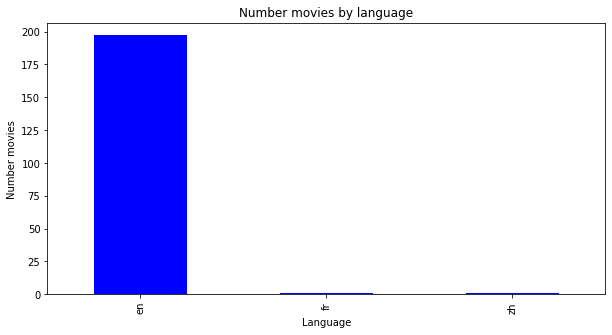

In [355]:
movies_oscars['original_language'].value_counts().nlargest(40).plot(kind= 'bar', figsize=(10,5), color = 'blue')
plt.title('Number movies by language')
plt.ylabel('Number movies')
plt.xlabel('Language')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a1754d0>,
      dtype=object)

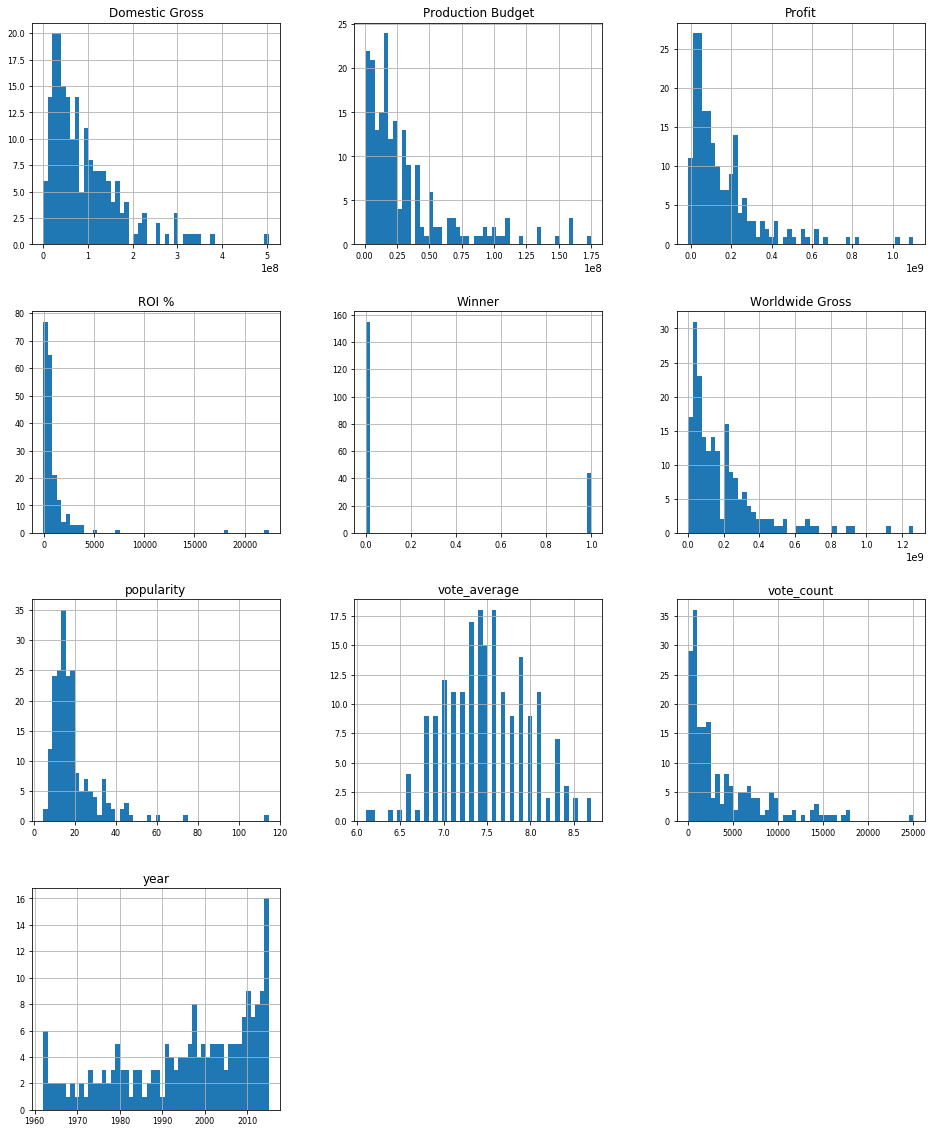

In [289]:
#check varible distribution

movies_oscars.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

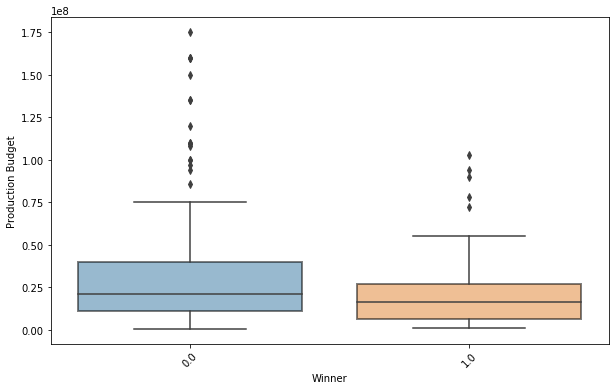

In [352]:
#Production Budget: nominees vs winner

plt.figure(figsize = (10, 6))
ax = sb.boxplot(x='Winner', y='Production Budget', data=movies_oscars)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

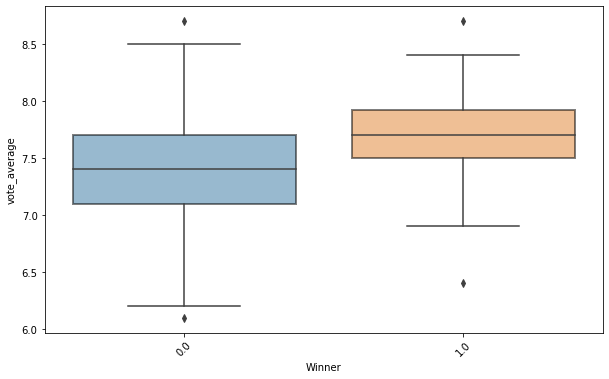

In [291]:
#Nº votes:winners vs nominees

plt.figure(figsize = (10, 6))
ax = sb.boxplot(x='Winner', y='vote_average', data=movies_oscars)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

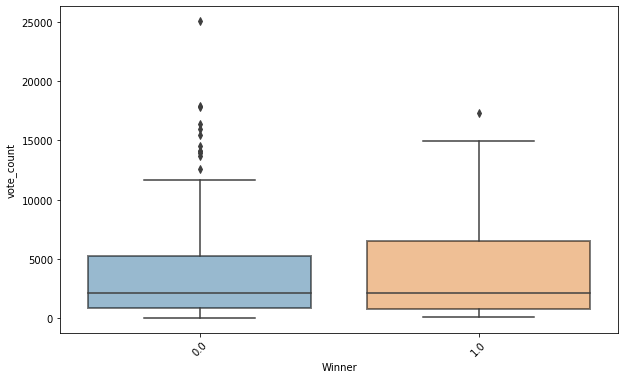

In [292]:
#Vote Score: winners vs nominees

plt.figure(figsize = (10, 6))
ax = sb.boxplot(x='Winner', y='vote_count', data=movies_oscars)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

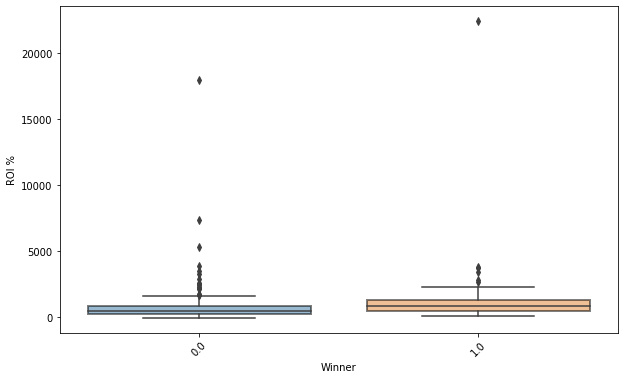

In [295]:
#Return on Investment: winnes vs nominees

plt.figure(figsize = (10, 6))
ax = sb.boxplot(x='Winner', y='ROI %', data=movies_oscars)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [299]:
#check ROI outliers
movies_oscars[movies_oscars['ROI %'] >10000]

Year  Winner              title              title_year  popularity  \
21  1973     0.0  american graffiti  American Graffiti 1973      12.455   
29  1976     1.0              rocky              Rocky 1976      25.596   

    vote_count original_language     original_title genre_ids  vote_average  \
21         752                en  American Graffiti  [35, 18]           7.1   
29        4439                en              Rocky      [18]           7.7   

   release_date  year     id  Production Budget  Domestic Gross  \
21   1973-08-01  1973  5,606           777000.0     115000000.0   
29   1976-11-21  1976  5,439          1000000.0     117235147.0   

    Worldwide Gross       Profit         ROI %  
21      140000000.0  139223000.0  17918.018018  
29      225000000.0  224000000.0  22400.000000

In [302]:
#remove ROI outliers 
movies_oscars_no_roi_outliers = movies_oscars.drop(21)
movies_oscars_no_roi_outliers = movies_oscars_no_roi_outliers.drop(29)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

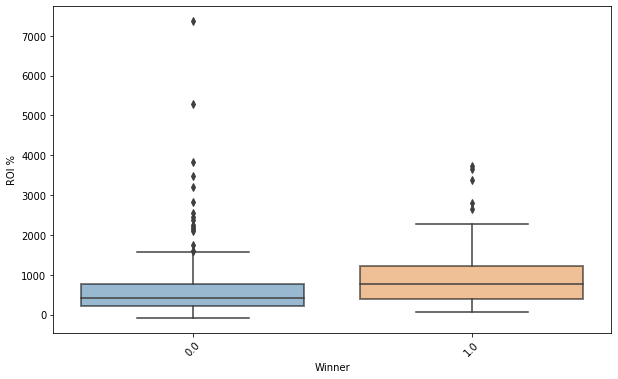

In [303]:
#ROI without 2 outliers
plt.figure(figsize = (10, 6))
ax = sb.boxplot(x='Winner', y='ROI %', data=movies_oscars_no_roi_outliers)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [366]:
movies_oscars[movies_oscars['popularity'] >100]

Year  Winner      title      title_year  popularity  vote_count  \
104  2000     1.0  gladiator  Gladiator 2000     114.535       11270   

    original_language original_title     genre_ids  vote_average release_date  \
104                en      Gladiator  [28, 12, 18]           8.1   2000-05-01   

     year   id  Production Budget  Domestic Gross  Worldwide Gross  \
104  2000  373        103000000.0     187683805.0      457683805.0   

          Profit       ROI % Movie Generation  
104  354683805.0  344.353209      Gen Z movie

In [359]:
#remove popular outlier
movies_oscars_no_gladiator = movies_oscars.drop(104)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

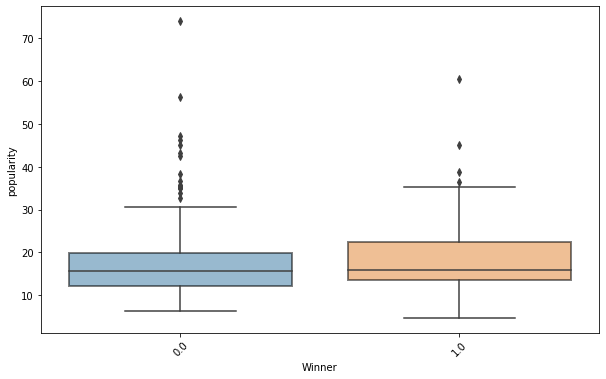

In [360]:
#Popularity distribution winners vs nominees

plt.figure(figsize = (10, 6))
ax = sb.boxplot(x='Winner', y='popularity', data=movies_oscars_no_gladiator)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [305]:
# Finding the relations between the variables
coor =movies_oscars.corr()
corr

#popular movies, with high vote counts and vote average are positively correlated with box office revenue, 
#budget (and therefore ROI) 

# Vote count with popularity

Winner  popularity  vote_count  vote_average      year  \
Winner             1.000000    0.122155    0.019725      0.222864 -0.270947   
popularity         0.122155    1.000000    0.760508      0.543868  0.193758   
vote_count         0.019725    0.760508    1.000000      0.585290  0.385731   
vote_average       0.222864    0.543868    0.585290      1.000000 -0.030037   
year              -0.270947    0.193758    0.385731     -0.030037  1.000000   
Production Budget -0.119328    0.470730    0.556777      0.106194  0.343679   
Domestic Gross     0.049032    0.480007    0.559905      0.231939  0.109512   
Worldwide Gross    0.029962    0.561198    0.666370      0.255133  0.225391   
Profit             0.056966    0.538274    0.639575      0.265779  0.185971   
ROI %              0.138899    0.029129    0.007629      0.002560 -0.195511   

                   Production Budget  Domestic Gross  Worldwide Gross  \
Winner                     -0.119328        0.049032         0.029962   
popularity                  0.470730        0.480007         0.561198   
vote_count                  0.556777        0.559905         0.666370   
vote_average                0.106194        0.231939         0.255133   
year                        0.343679        0.109512         0.225391   
Production Budget           1.000000        0.577244         0.682252   
Domestic Gross              0.577244        1.000000         0.925468   
Worldwide Gross             0.682252        0.925468         1.000000   
Profit                      0.570803        0.926558         0.989742   
ROI %                      -0.211310        0.117635         0.081673   

                     Profit     ROI %  
Winner             0.056966  0.138899  
popularity         0.538274  0.029129  
vote_count         0.639575  0.007629  
vote_average       0.265779  0.002560  
year               0.185971 -0.195511  
Production Budget  0.570803 -0.211310  
Domestic Gross     0.926558  0.117635  
Worldwide Gross    0.989742  0.081673  
Profit             1.000000  0.133014  
ROI %              0.133014  1.000000

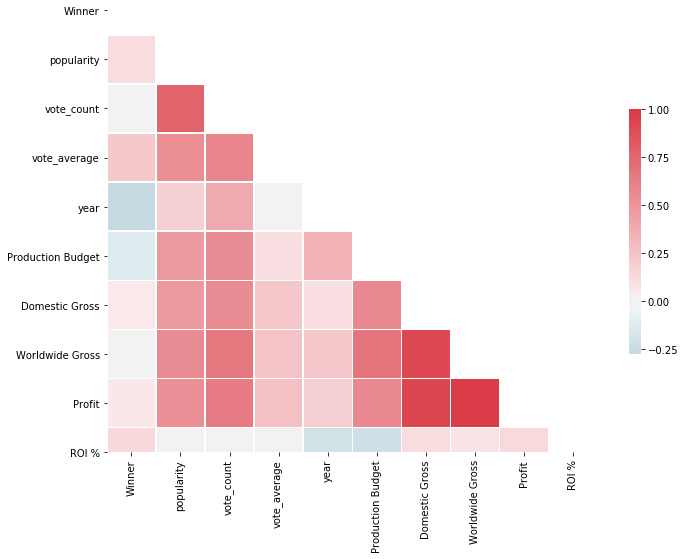

In [373]:
#GRAPH that represents table above

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

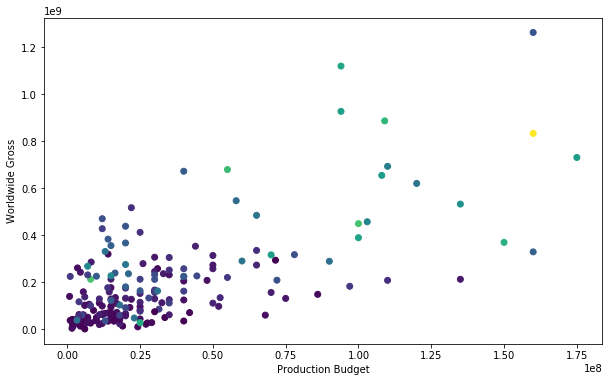

In [307]:
# Measure movie fame success
# Box office vs Budget  - paininting by number of vote count

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_oscars['Production Budget'], movies_oscars['Worldwide Gross'], c = movies_oscars['vote_count'])
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')
plt.show()


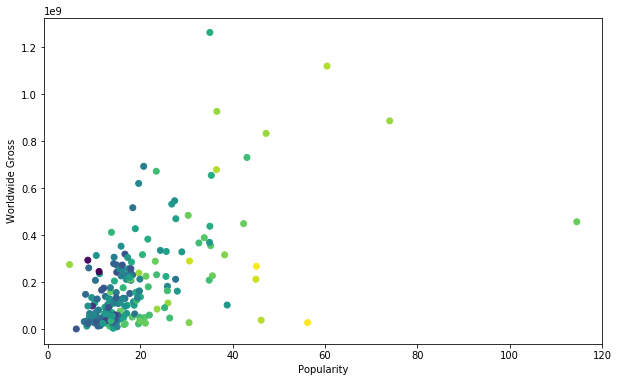

In [363]:
# Box Office vs Popularity  - paininting by number of vote average

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_oscars['popularity'], movies_oscars['Worldwide Gross'], c = movies_oscars['vote_average'])
ax.set_xlabel('Popularity')
ax.set_ylabel('Worldwide Gross')
plt.show()

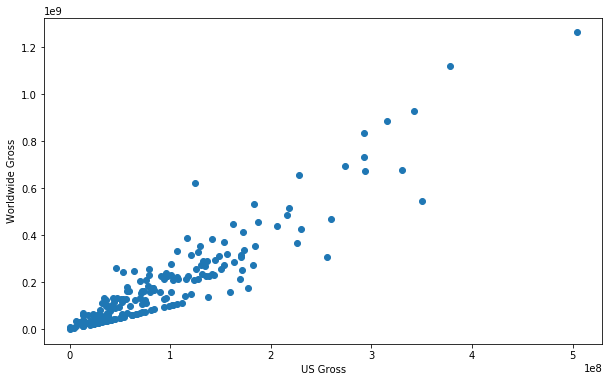

In [308]:
#Worldwide Gross vs United States Domestic Gross

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_oscars['Domestic Gross'], movies_oscars['Worldwide Gross'])
ax.set_xlabel('US Gross')
ax.set_ylabel('Worldwide Gross')
plt.show()

#very likely that if a movie performs well in the US will also perform well outside

In [309]:
# separate based on generations

#1962-1980 - Boomer
#1980-1998 - Millennials
#1998-2015 - Gen Z

movies_oscars.loc[(movies_oscars['year'] < 1980), 'Movie Generation'] = 'Boomer movie'
movies_oscars.loc[(movies_oscars['year'] >= 1980) & (movies_oscars['year'] < 1998), 'Movie Generation'] = 'Millennial movie'
movies_oscars.loc[(movies_oscars['year'] > 1998), 'Movie Generation'] = 'Gen Z movie'

movies_oscars_no_gladiator = movies_oscars.drop(105)

movies_oscars.head()

Year  Winner                  title                  title_year  \
0  1962     1.0     lawrence of arabia     Lawrence of Arabia 1962   
1  1962     0.0        the longest day        The Longest Day 1962   
2  1962     0.0   mutiny on the bounty   Mutiny on the Bounty 1962   
3  1962     0.0  to kill a mockingbird  To Kill a Mockingbird 1962   
4  1963     0.0              cleopatra              Cleopatra 1963   

   popularity  vote_count original_language         original_title  \
0      13.806        1652                en     Lawrence of Arabia   
1      16.451         504                en        The Longest Day   
2      10.860         144                en   Mutiny on the Bounty   
3      13.392        1500                en  To Kill a Mockingbird   
4      13.837         330                en              Cleopatra   

             genre_ids  vote_average release_date  year     id  \
0  [12, 18, 36, 10752]           8.0   1962-12-10  1962  3,145   
1      [18, 36, 10752]           7.6   1962-09-25  1962  3,693   
2         [12, 18, 36]           6.9   1962-11-08  1962  2,838   
3             [80, 18]           8.0   1962-12-25  1962  5,116   
4      [18, 36, 10749]           7.0   1963-06-12  1963  1,395   

   Production Budget  Domestic Gross  Worldwide Gross      Profit       ROI %  \
0         15000000.0      37495385.0       69995385.0  54995385.0  366.635900   
1         10000000.0      39100000.0       50100000.0  40100000.0  401.000000   
2         19000000.0      13680000.0       13680000.0  -5320000.0  -28.000000   
3          2000000.0      13129846.0       13129846.0  11129846.0  556.492300   
4         42000000.0      57000000.0       71000000.0  29000000.0   69.047619   

  Movie Generation  
0     Boomer movie  
1     Boomer movie  
2     Boomer movie  
3     Boomer movie  
4     Boomer movie

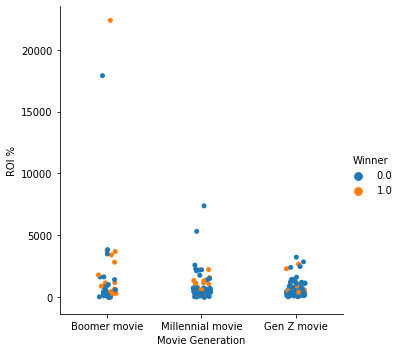

In [364]:
#Return on Investment among 3 generations with winner vs nominee
sb.catplot(x = 'Movie Generation', y = 'ROI %', hue = 'Winner', data = movies_oscars)

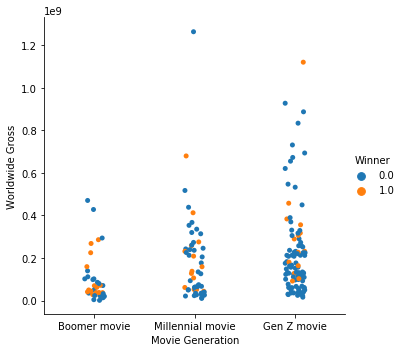

In [365]:
#Box office revenue among 3 generations with winner vs nominee

sb.catplot(x = 'Movie Generation', y = 'Worldwide Gross', hue = 'Winner', data = movies_oscars)

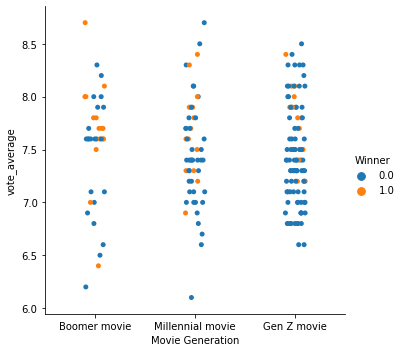

In [347]:
#Vote average among 3 generations with winner vs nominee

sb.catplot(x = 'Movie Generation', y = 'vote_average', hue = 'Winner', data = movies_oscars)

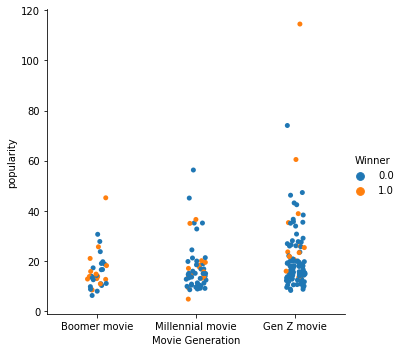

In [346]:
#Popularity among 3 generations with winner vs nominee

sb.catplot(x = 'Movie Generation', y = 'popularity', hue = 'Winner', data = movies_oscars)

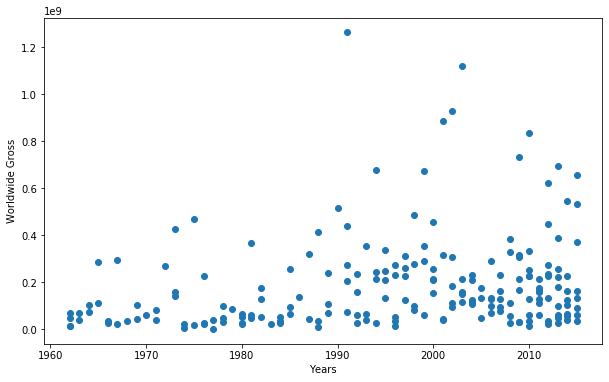

In [311]:
#Box office over the years

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_oscars['year'], movies_oscars['Worldwide Gross'])
ax.set_xlabel('Years')
ax.set_ylabel('Worldwide Gross')
plt.show()

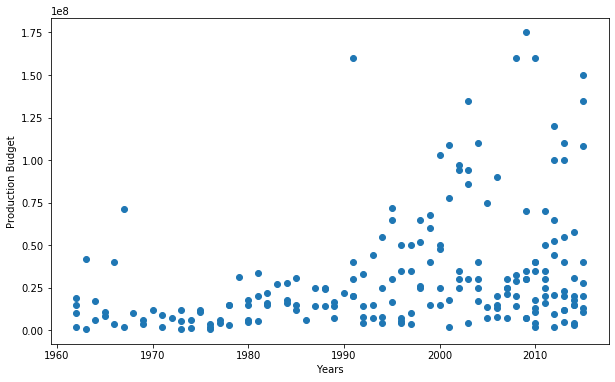

In [312]:
#Production budget over the years

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_oscars['year'], movies_oscars['Production Budget'])
ax.set_xlabel('Years')
ax.set_ylabel('Production Budget')
plt.show()

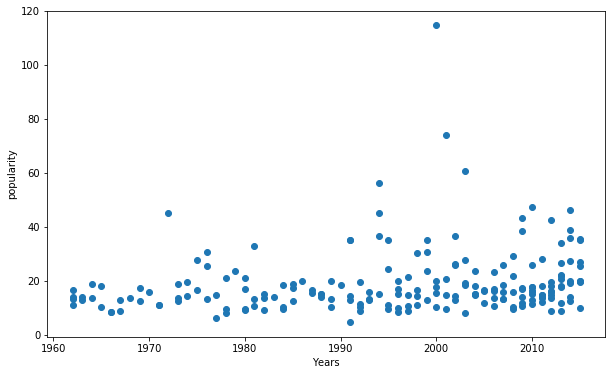

In [313]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_oscars['year'], movies_oscars['popularity'])
ax.set_xlabel('Years')
ax.set_ylabel('popularity')
plt.show()

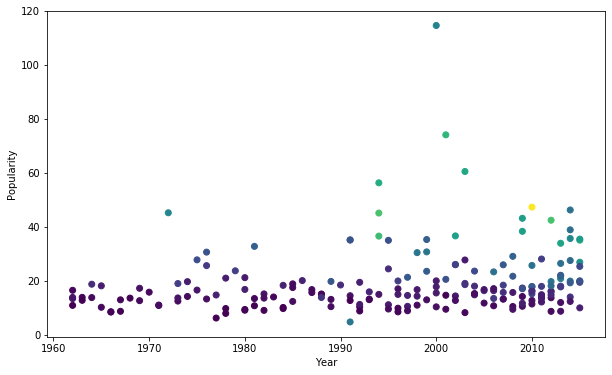

In [314]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_oscars['year'], movies_oscars['popularity'], c = movies_oscars['vote_count'])
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')
plt.show()

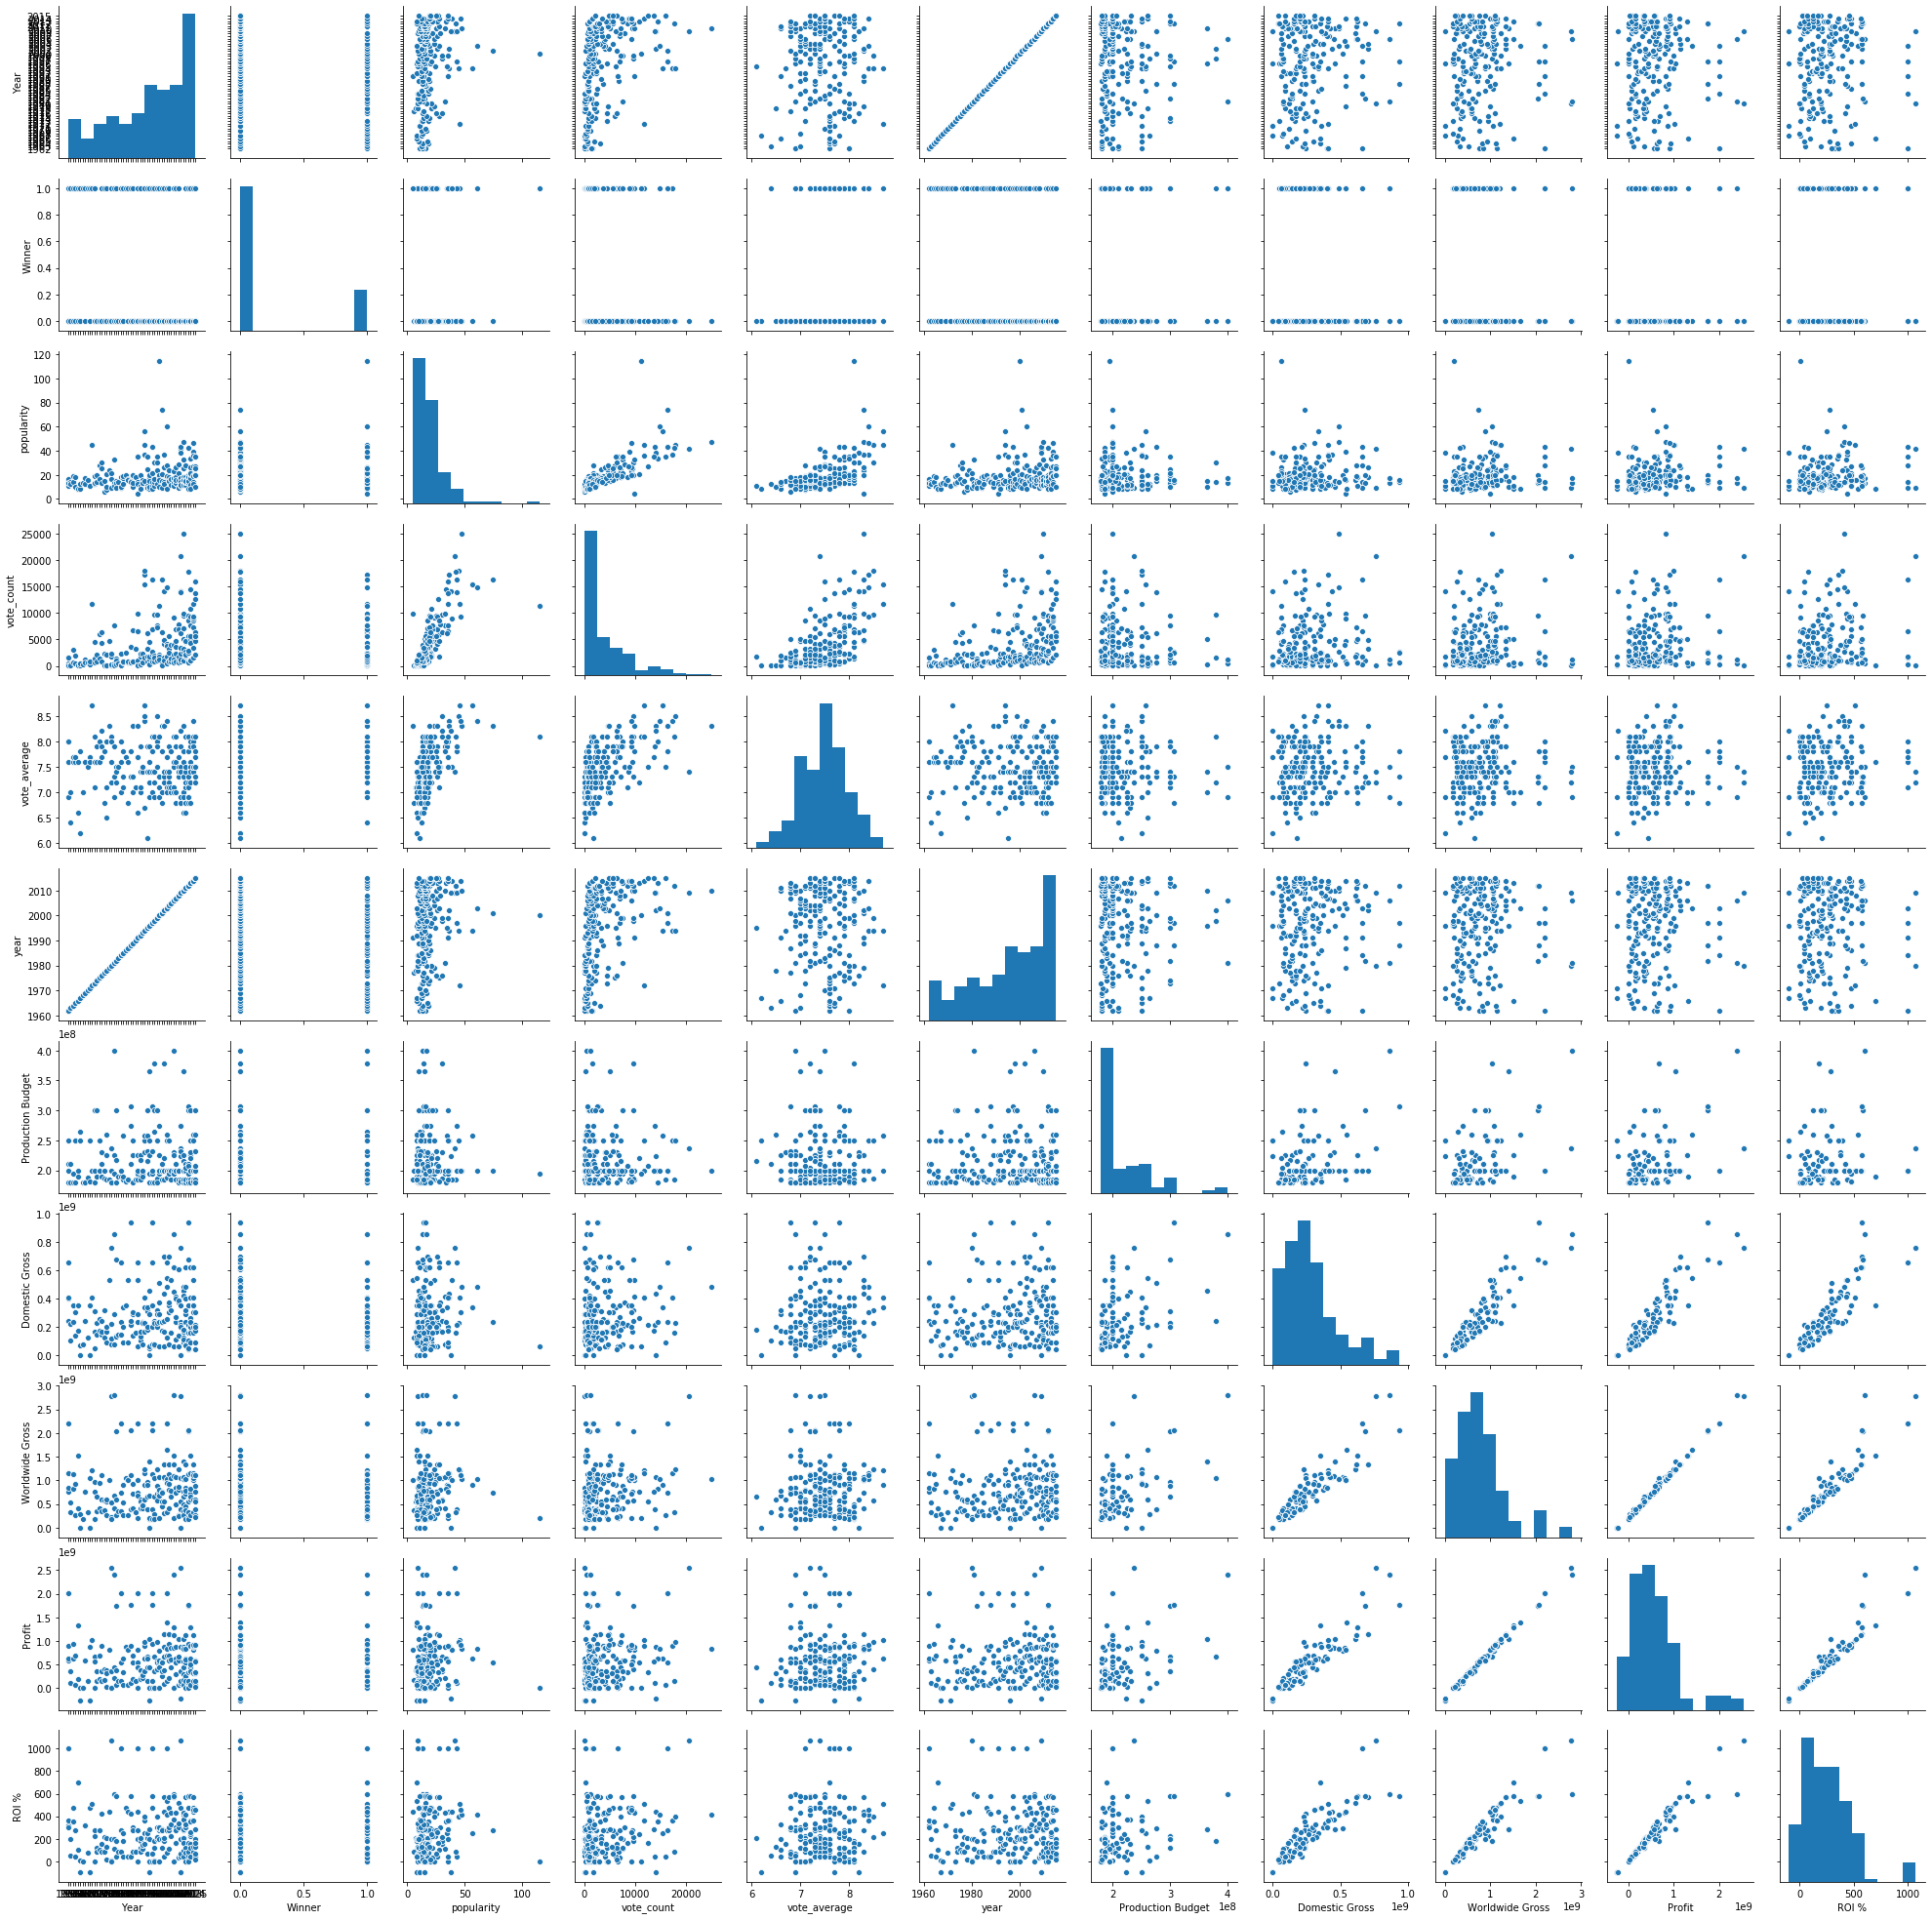

In [82]:
sb.pairplot(movies_oscars)

### Movies that have not been to the oscars

In [315]:
movies_no_oscars = df_finalissima[~df_finalissima['title'].isin(movies_oscars['title'])]
movies_no_oscars['Oscars'] = 'no Oscars'
movies_no_oscars

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id  Release Date                          title  Production Budget  \
0     101  Jul 16, 2018  mission: impossibleâfallout        178000000.0   
1     102  May 18, 2016              x-men: apocalypse        178000000.0   
2     103   Aug 9, 2018                        the meg        178000000.0   
3     104  May 28, 2014               edge of tomorrow        178000000.0   
4     105   Mar 6, 2019                 captain marvel        175000000.0   
..    ...           ...                            ...                ...   
95  5,996   Dec 1, 2015                    dutch kills            25000.0   
96  5,997   Aug 1, 1991                        slacker            23000.0   
97  5,998       Unknown                      dry spell            22000.0   
98  5,999  Jan 11, 2002                   steel spirit            20000.0   
99  6,000       Unknown                       flywheel            20000.0   

    Domestic Gross  Worldwide Gross       Profit        ROI %     Oscars  
0      220159104.0     7.874566e+08  609456552.0   342.391321  no Oscars  
1      155442489.0     5.425375e+08  364537546.0   204.796374  no Oscars  
2      145443742.0     5.295307e+08  351530715.0   197.489166  no Oscars  
3      100206256.0     3.705413e+08  192541256.0   108.169245  no Oscars  
4      426829839.0     1.129730e+09  954729839.0   545.559908  no Oscars  
..             ...              ...          ...          ...        ...  
95             0.0     0.000000e+00     -25000.0  -100.000000  no Oscars  
96       1227508.0     1.227508e+06    1204508.0  5236.991304  no Oscars  
97             0.0     0.000000e+00     -22000.0  -100.000000  no Oscars  
98          1860.0     1.860000e+03     -18140.0   -90.700000  no Oscars  
99             0.0     0.000000e+00     -20000.0  -100.000000  no Oscars  

[5702 rows x 9 columns]

In [316]:
#create year column
movies_no_oscars['date'] = movies_no_oscars['Release Date'].str.extract(r'([0-9][0-9][0-9][0-9])', expand=True)

movies_no_oscars['date'] = movies_no_oscars['date'].astype('datetime64[ns]')

movies_no_oscars['year'] = pd.DatetimeIndex(movies_no_oscars['date']).year

movies_no_oscars.sort_values(by=['year'])
movies_no_oscars

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

id  Release Date                          title  Production Budget  \
0     101  Jul 16, 2018  mission: impossibleâfallout        178000000.0   
1     102  May 18, 2016              x-men: apocalypse        178000000.0   
2     103   Aug 9, 2018                        the meg        178000000.0   
3     104  May 28, 2014               edge of tomorrow        178000000.0   
4     105   Mar 6, 2019                 captain marvel        175000000.0   
..    ...           ...                            ...                ...   
95  5,996   Dec 1, 2015                    dutch kills            25000.0   
96  5,997   Aug 1, 1991                        slacker            23000.0   
97  5,998       Unknown                      dry spell            22000.0   
98  5,999  Jan 11, 2002                   steel spirit            20000.0   
99  6,000       Unknown                       flywheel            20000.0   

    Domestic Gross  Worldwide Gross       Profit        ROI %     Oscars  \
0      220159104.0     7.874566e+08  609456552.0   342.391321  no Oscars   
1      155442489.0     5.425375e+08  364537546.0   204.796374  no Oscars   
2      145443742.0     5.295307e+08  351530715.0   197.489166  no Oscars   
3      100206256.0     3.705413e+08  192541256.0   108.169245  no Oscars   
4      426829839.0     1.129730e+09  954729839.0   545.559908  no Oscars   
..             ...              ...          ...          ...        ...   
95             0.0     0.000000e+00     -25000.0  -100.000000  no Oscars   
96       1227508.0     1.227508e+06    1204508.0  5236.991304  no Oscars   
97             0.0     0.000000e+00     -22000.0  -100.000000  no Oscars   
98          1860.0     1.860000e+03     -18140.0   -90.700000  no Oscars   
99             0.0     0.000000e+00     -20000.0  -100.000000  no Oscars   

         date    year  
0  2018-01-01  2018.0  
1  2016-01-01  2016.0  
2  2018-01-01  2018.0  
3  2014-01-01  2014.0  
4  2019-01-01  2019.0  
..        ...     ...  
95 2015-01-01  2015.0  
96 1991-01-01  1991.0  
97        NaT     NaN  
98 2002-01-01  2002.0  
99        NaT     NaN  

[5702 rows x 11 columns]

In [317]:
movies_no_oscars.dtypes

id                           object
Release Date                 object
title                        object
Production Budget           float64
Domestic Gross              float64
Worldwide Gross             float64
Profit                      float64
ROI %                       float64
Oscars                       object
date                 datetime64[ns]
year                        float64
dtype: object

In [318]:
movies_no_oscars.mean(axis = 0)

Production Budget    2.837090e+07
Domestic Gross       3.601594e+07
Worldwide Gross      7.686047e+07
Profit               4.848957e+07
ROI %                3.443431e+02
year                 2.004373e+03
dtype: float64

In [319]:
movies_no_oscars.corr()

Production Budget  Domestic Gross  Worldwide Gross  \
Production Budget           1.000000        0.635970         0.689482   
Domestic Gross              0.635970        1.000000         0.928990   
Worldwide Gross             0.689482        0.928990         1.000000   
Profit                      0.522413        0.909685         0.977802   
ROI %                      -0.050071        0.071711         0.057882   
year                        0.156515        0.023733         0.090955   

                     Profit     ROI %      year  
Production Budget  0.522413 -0.050071  0.156515  
Domestic Gross     0.909685  0.071711  0.023733  
Worldwide Gross    0.977802  0.057882  0.090955  
Profit             1.000000  0.082627  0.061929  
ROI %              0.082627  1.000000 -0.107712  
year               0.061929 -0.107712  1.000000

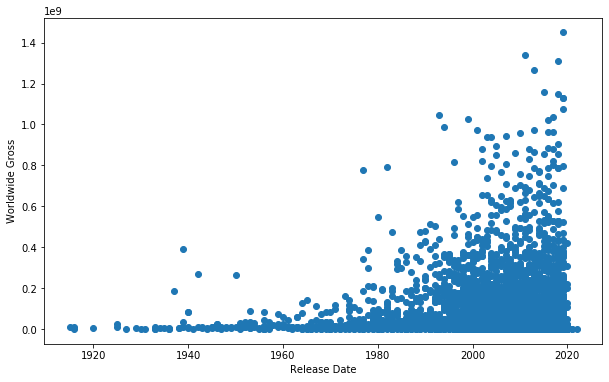

In [321]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_no_oscars['year'], movies_no_oscars['Worldwide Gross'])
ax.set_xlabel('Release Date')
ax.set_ylabel('Worldwide Gross')
plt.show()

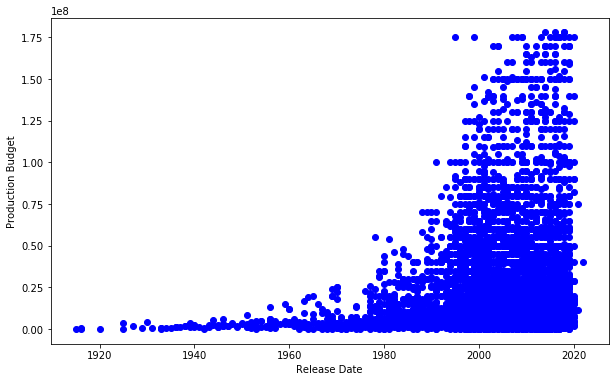

In [351]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_no_oscars['year'], movies_no_oscars['Production Budget'], color='blue')
ax.set_xlabel('Release Date')
ax.set_ylabel('Production Budget')
plt.show()

In [322]:
TMDB_data['year'] = pd.DatetimeIndex(TMDB_data['release_date']).year
TMDB_data.head()

popularity  vote_count original_language         original_title  \
0      13.806        1652                en     Lawrence of Arabia   
0      16.451         504                en        The Longest Day   
0      11.250         150                en   Mutiny on the Bounty   
1      10.860         144                en   Mutiny on the Bounty   
0      13.392        1500                en  To Kill a Mockingbird   

             genre_ids                  title  vote_average  \
0  [12, 18, 36, 10752]     Lawrence of Arabia           8.0   
0      [18, 36, 10752]        The Longest Day           7.6   
0         [12, 18, 36]   Mutiny on the Bounty           7.4   
1         [12, 18, 36]   Mutiny on the Bounty           6.9   
0             [80, 18]  To Kill a Mockingbird           8.0   

                                            overview release_date  year  \
0  The story of British officer T.E. Lawrence's m...   1962-12-10  1962   
0  The retelling of June 6, 1944, from the perspe...   1962-09-25  1962   
0  Fletcher Christian successfully leads a revolt...   1935-11-22  1935   
1  The Bounty leaves Portsmouth in 1787. Its dest...   1962-11-08  1962   
0  Scout Finch, 6, and her older brother Jem live...   1962-12-25  1962   

                   title_year  
0     Lawrence of Arabia 1962  
0        The Longest Day 1962  
0   Mutiny on the Bounty 1935  
1   Mutiny on the Bounty 1962  
0  To Kill a Mockingbird 1962

### other Kaagle database - Getting reliable budget data

DISCLAMER: I didn't need this dataset in the end.

In [371]:
kaagle = pd.read_csv('movies_metadata.csv', low_memory=False)
kaagle.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [324]:
kaagle['original_title'] = kaagle['original_title'].apply(lambda x: x.lower())

In [325]:
kaagle[kaagle['original_title'] == 'spotlight']


adult belongs_to_collection    budget  \
33041  False                   NaN  20000000   

                                                  genres  \
33041  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   

                              homepage      id    imdb_id original_language  \
33041  http://www.spotlightthefilm.com  314365  tt1895587                en   

      original_title                                           overview  ...  \
33041      spotlight  The true story of how The Boston Globe uncover...  ...   

      release_date     revenue runtime  \
33041   2015-11-06  88346473.0   128.0   

                               spoken_languages    status  \
33041  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                   tagline      title  video vote_average  \
33041  Break the story. Break the silence.  Spotlight  False          7.8   

      vote_count  
33041     2751.0  

[1 rows x 24 columns]

In [326]:
kaagle[kaagle['original_title'] == 'lawrence of arabia']

adult belongs_to_collection    budget  \
1162  False                   NaN  15000000   

                                                 genres homepage   id  \
1162  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...      NaN  947   

        imdb_id original_language      original_title  \
1162  tt0056172                en  lawrence of arabia   

                                               overview  ... release_date  \
1162  An epic about British officer T.E. Lawrence's ...  ...   1962-12-10   

         revenue runtime                                   spoken_languages  \
1162  69995385.0   216.0  [{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...   

        status  tagline               title  video vote_average vote_count  
1162  Released      NaN  Lawrence of Arabia  False          7.8      870.0  

[1 rows x 24 columns]

In [327]:
kaagle.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [328]:
del kaagle['adult']
del kaagle['belongs_to_collection']
del kaagle['genres']
del kaagle['homepage']
del kaagle['id']
del kaagle['imdb_id']
del kaagle['original_language']
del kaagle['overview']
del kaagle['popularity']
del kaagle['poster_path']
del kaagle['status']
del kaagle['tagline']
del kaagle['title']
del kaagle['video']
del kaagle['vote_average']
del kaagle['vote_count']

In [329]:
del kaagle['spoken_languages']

In [330]:
kaagle = kaagle.rename({'original_title': 'title'}, axis=1)
kaagle.head()

budget                        title  \
0  30000000                    toy story   
1  65000000                      jumanji   
2         0             grumpier old men   
3  16000000            waiting to exhale   
4         0  father of the bride part ii   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   

       revenue  runtime  
0  373554033.0     81.0  
1  262797249.0    104.0  
2          0.0    101.0  
3   81452156.0    127.0  
4   76578911.0    106.0

#### Merge all datasets

In [331]:
movies_oscars_kaagle = pd.merge(kaagle, movies_oscars, on='title')
movies_oscars_kaagle =movies_oscars_kaagle.sort_values(by=['year'])

movies_oscars_kaagle['budget'] = movies_oscars_kaagle['budget'].astype(int)
movies_oscars_kaagle['Profit'] = movies_oscars_kaagle['Worldwide Gross'] - movies_oscars_kaagle['budget']
movies_oscars_kaagle['ROI %'] = movies_oscars_kaagle['Profit']/movies_oscars_kaagle['budget']
movies_oscars_kaagle

budget                  title  \
40     2000000  to kill a mockingbird   
39    15000000     lawrence of arabia   
99    10000000        the longest day   
65     1950000   mutiny on the bounty   
66    19000000   mutiny on the bounty   
..         ...                    ...   
228  108000000            the martian   
229    6000000                   room   
230          0                   room   
231   20000000              spotlight   
233   28000000          the big short   

                                  production_companies  \
40          [{'name': 'Universal Pictures', 'id': 33}]   
39    [{'name': 'Horizon Pictures (II)', 'id': 11356}]   
99   [{'name': 'Twentieth Century Fox Film Corporat...   
65   [{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...   
66   [{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...   
..                                                 ...   
228  [{'name': 'Twentieth Century Fox Film Corporat...   
229  [{'name': 'Téléfilm Canada', 'id': 806}, {'nam...   
230                                                 []   
231  [{'name': 'Universal Pictures', 'id': 33}, {'n...   
233  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   

                                  production_countries release_date_x  \
40   [{'iso_3166_1': 'US', 'name': 'United States o...     1962-12-25   
39    [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]     1962-12-10   
99   [{'iso_3166_1': 'US', 'name': 'United States o...     1962-09-25   
65   [{'iso_3166_1': 'US', 'name': 'United States o...     1935-11-08   
66   [{'iso_3166_1': 'US', 'name': 'United States o...     1962-11-08   
..                                                 ...            ...   
228  [{'iso_3166_1': 'US', 'name': 'United States o...     2015-09-30   
229  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...     2015-10-16   
230                                                 []     2005-04-01   
231  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...     2015-11-06   
233  [{'iso_3166_1': 'US', 'name': 'United States o...     2015-12-11   

         revenue  runtime  Year  Winner                  title_year  ...  \
40    13129846.0    129.0  1962     0.0  To Kill a Mockingbird 1962  ...   
39    69995385.0    216.0  1962     1.0     Lawrence of Arabia 1962  ...   
99    50100000.0    178.0  1962     0.0        The Longest Day 1962  ...   
65     4460000.0    132.0  1962     0.0   Mutiny on the Bounty 1962  ...   
66    13680000.0    178.0  1962     0.0   Mutiny on the Bounty 1962  ...   
..           ...      ...   ...     ...                         ...  ...   
228  630161890.0    141.0  2015     0.0            The Martian 2015  ...   
229   35401758.0    117.0  2015     0.0                   Room 2015  ...   
230          0.0      0.0  2015     0.0                   Room 2015  ...   
231   88346473.0    128.0  2015     1.0              Spotlight 2015  ...   
233  133346506.0    130.0  2015     0.0          The Big Short 2015  ...   

     vote_average  release_date_y  year     id Production Budget  \
40            8.0      1962-12-25  1962  5,116         2000000.0   
39            8.0      1962-12-10  1962  3,145        15000000.0   
99            7.6      1962-09-25  1962  3,693        10000000.0   
65            6.9      1962-11-08  1962  2,838        19000000.0   
66            6.9      1962-11-08  1962  2,838        19000000.0   
..            ...             ...   ...    ...               ...   
228           7.7      2015-09-30  2015    363       108000000.0   
229           8.1      2015-10-16  2015  3,399        13000000.0   
230           8.1      2015-10-16  2015  3,399        13000000.0   
231           7.8      2015-11-06  2015  2,623        20000000.0   
233           7.3      2015-12-11  2015  2,114        28000000.0   

     Domestic Gross Worldwide Gross       Profit     ROI %  Movie Generation  
40       13129846.0      13129846.0   11129846.0  5.564923      Boomer movie  
39       37495385.0      69995385.0   54995385.0  3.6

In [332]:
del movies_oscars_kaagle['Production Budget']
del movies_oscars_kaagle['revenue']
del movies_oscars_kaagle['release_date_x']
del movies_oscars_kaagle['production_companies']
del movies_oscars_kaagle['production_countries']

In [333]:
movies_oscars_kaagle.dtypes

budget                        int64
title                        object
runtime                     float64
Year                         object
Winner                      float64
title_year                   object
popularity                  float64
vote_count                    int64
original_language            object
original_title               object
genre_ids                    object
vote_average                float64
release_date_y       datetime64[ns]
year                          int64
id                           object
Domestic Gross              float64
Worldwide Gross             float64
Profit                      float64
ROI %                       float64
Movie Generation             object
dtype: object

In [334]:
movies_oscars_kaagle.groupby(['Winner'])['vote_average'].agg(['mean', 'median', 'count'])

mean  median  count
Winner                         
0.0     7.415789     7.4    190
1.0     7.684091     7.7     44

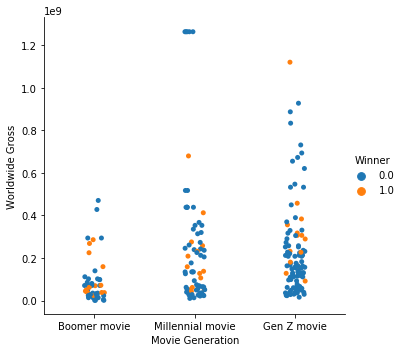

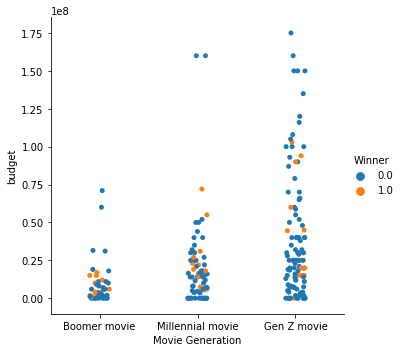

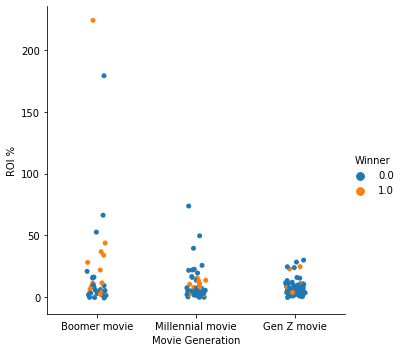

In [335]:
sb.catplot(x = 'Movie Generation', y = 'Worldwide Gross', hue = 'Winner', data = movies_oscars_kaagle)
sb.catplot(x = 'Movie Generation', y = 'budget', hue = 'Winner', data = movies_oscars_kaagle)
sb.catplot(x = 'Movie Generation', y = 'ROI %', hue = 'Winner', data = movies_oscars_kaagle)

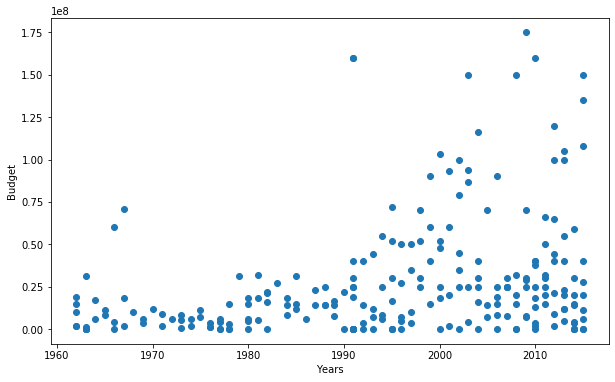

In [336]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(movies_oscars_kaagle['year'], movies_oscars_kaagle['budget'])
ax.set_xlabel('Years')
ax.set_ylabel('Budget')
plt.show()

In [337]:
movies_oscars_kaagle_budget = movies_oscars_kaagle.groupby(['Winner'])['budget'].describe().reset_index()
movies_oscars_kaagle_budget

Winner  count          mean           std  min        25%         50%  \
0     0.0  190.0  2.869393e+07  3.719307e+07  0.0  3729153.5  16000000.0   
1     1.0   44.0  2.360227e+07  2.552276e+07  0.0  6000000.0  15000000.0   

          75%          max  
0  35000000.0  175000000.0  
1  25500000.0  103000000.0

(array([0, 1]), <a list of 2 Text xticklabel objects>)

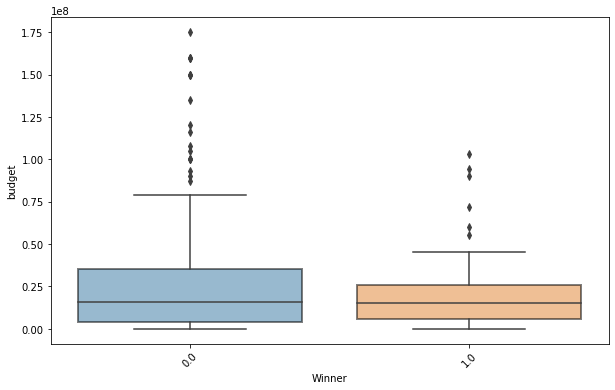

In [338]:
plt.figure(figsize = (10, 6))
ax = sb.boxplot(x='Winner', y='budget', data=movies_oscars_kaagle)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [339]:
movies_kaagle_no_oscars = kaagle[~kaagle['title'].isin(movies_oscars['title'])]
movies_kaagle_no_oscars

budget                        title  \
0      30000000                    toy story   
1      65000000                      jumanji   
2             0             grumpier old men   
3      16000000            waiting to exhale   
4             0  father of the bride part ii   
...         ...                          ...   
45461         0                      رگ خواب   
45462         0          siglo ng pagluluwal   
45463         0                     betrayal   
45464         0          satana likuyushchiy   
45465         0                     queerama   

                                    production_companies  \
0         [{'name': 'Pixar Animation Studios', 'id': 3}]   
1      [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2      [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3      [{'name': 'Twentieth Century Fox Film Corporat...   
4      [{'name': 'Sandollar Productions', 'id': 5842}...   
...                                                  ...   
45461                                                 []   
45462             [{'name': 'Sine Olivia', 'id': 19653}]   
45463  [{'name': 'American World Pictures', 'id': 6165}]   
45464               [{'name': 'Yermoliev', 'id': 88753}]   
45465                                                 []   

                                    production_countries release_date  \
0      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
2      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
3      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
4      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   
...                                                  ...          ...   
45461             [{'iso_3166_1': 'IR', 'name': 'Iran'}]          NaN   
45462      [{'iso_3166_1': 'PH', 'name': 'Philippines'}]   2011-11-17   
45463  [{'iso_3166_1': 'US', 'name': 'United States o...   2003-08-01   
45464           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   1917-10-21   
45465   [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]   2017-06-09   

           revenue  runtime  
0      373554033.0     81.0  
1      262797249.0    104.0  
2              0.0    101.0  
3       81452156.0    127.0  
4       76578911.0    106.0  
...            ...      ...  
45461          0.0     90.0  
45462          0.0    360.0  
45463          0.0     90.0  
45464          0.0     87.0  
45465          0.0     75.0  

[45239 rows x 7 columns]

In [342]:
movies_kaagle_no_oscars.dtypes

budget                   object
title                    object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
dtype: object